In [ ]:

pip install pandasql

  Preparing metadata (setup.py) ... done
  Created wheel for pandasql: filename=pandasql-0.7.3-py3-none-any.whl size=26772 sha256=4bb0e2143e2912f70cb0f253d18b24cfb10de05bc968139863edf917033faa80
  Stored in directory: /root/.cache/pip/wheels/e9/bc/3a/8434bdcccf5779e72894a9b24fecbdcaf97940607eaf4bcdf9
Successfully built pandasql


In [ ]:
#Step -1
#importing the libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import pandasql as ps

# Set to display all the columns of the dataset
pd.set_option("display.max_columns",None)

#Ignore harmless warnings
import warnings
warnings.filterwarnings("ignore")

In [ ]:
#Step -2
#Load the data
bsdata=pd.read_csv(r"/content/drive/MyDrive/apple_quality.csv",header=0)
#Step -3
#Copy to back_up file
bsdata_bk=bsdata.copy()
#Display first 5 records
bsdata.head()

,A_id,Size,Weight,Sweetness,Crunchiness,Juiciness,Ripeness,Acidity,Quality
0,0.0,-3.970049,-2.512336,5.346330,-1.012009,1.844900,0.329840,-0.491590483,good
1,1.0,-1.195217,-2.839257,3.664059,1.588232,0.853286,0.867530,-0.722809367,good
2,2.0,-0.292024,-1.351282,-1.738429,-0.342616,2.838636,-0.038033,2.621636473,bad
3,3.0,-0.657196,-2.271627,1.324874,-0.097875,3.637970,-3.413761,0.790723217,good
4,4.0,1.364217,-1.296612,-0.384658,-0.553006,3.030874,-1.303849,0.501984036,good


In [ ]:
#Step -4
#Display the data set information
bsdata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4001 entries, 0 to 4000
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   A_id         4000 non-null   float64
 1   Size         4000 non-null   float64
 2   Weight       4000 non-null   float64
 3   Sweetness    4000 non-null   float64
 4   Crunchiness  4000 non-null   float64
 5   Juiciness    4000 non-null   float64
 6   Ripeness     4000 non-null   float64
 7   Acidity      4001 non-null   object 
 8   Quality      4000 non-null   object 
dtypes: float64(7), object(2)
memory usage: 281.4+ KB


In [ ]:
bsdata.Quality.value_counts()

good    2004
bad     1996
Name: Quality, dtype: int64

In [ ]:
# Count the target or dependent variable by '0' & '1' and their proportion
# (>= 10 : 1, then the dataset is imbalance data)

Quality = bsdata.Quality.value_counts()
print("proportion: ",Quality['good']/Quality['bad'],":1")

proportion:  1.0040080160320641 :1


In [ ]:
#Step -5
#Display the unique values of the data set
bsdata.nunique()

A_id           4000
Size           4000
Weight         4000
Sweetness      4000
Crunchiness    4000
Juiciness      4000
Ripeness       4000
Acidity        4001
Quality           2
dtype: int64

In [ ]:
# Count the missig values by each variable, if available
bsdata.isnull().sum()

A_id           1
Size           1
Weight         1
Sweetness      1
Crunchiness    1
Juiciness      1
Ripeness       1
Acidity        0
Quality        1
dtype: int64

In [ ]:
bsdata['A_id'] = bsdata['A_id'].fillna(method='ffill')
bsdata['Size'] = bsdata['Size'].fillna(method='ffill')
bsdata['Weight'] = bsdata['Weight'].fillna(method='ffill')
bsdata['Sweetness'] = bsdata['Sweetness'].fillna(method='ffill')
bsdata['Crunchiness'] = bsdata['Crunchiness'].fillna(method='ffill')
bsdata['Juiciness'] = bsdata['Juiciness'].fillna(method='ffill')
bsdata['Ripeness'] = bsdata['Ripeness'].fillna(method='ffill')
bsdata['Quality'] = bsdata['Quality'].fillna(method='ffill')

In [ ]:
# Count the missig values by each variable, if available
bsdata.isnull().sum()

A_id           0
Size           0
Weight         0
Sweetness      0
Crunchiness    0
Juiciness      0
Ripeness       0
Acidity        0
Quality        0
dtype: int64

In [ ]:
#Step -6
#Check the duplicate  values with in  dataset if available
bsdata_dup=bsdata[bsdata.duplicated(keep='last')]
bsdata_dup

,A_id,Size,Weight,Sweetness,Crunchiness,Juiciness,Ripeness,Acidity,Quality


<Axes: xlabel='Quality', ylabel='Count'>

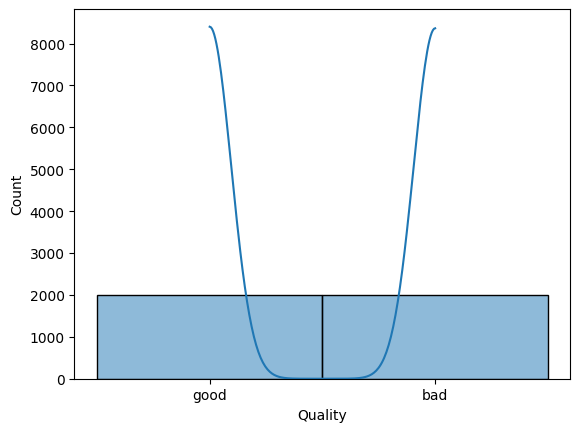

In [ ]:
#Step 7
#plotting histogram for the target variable.

sns.histplot(bsdata['Quality'],kde=True)

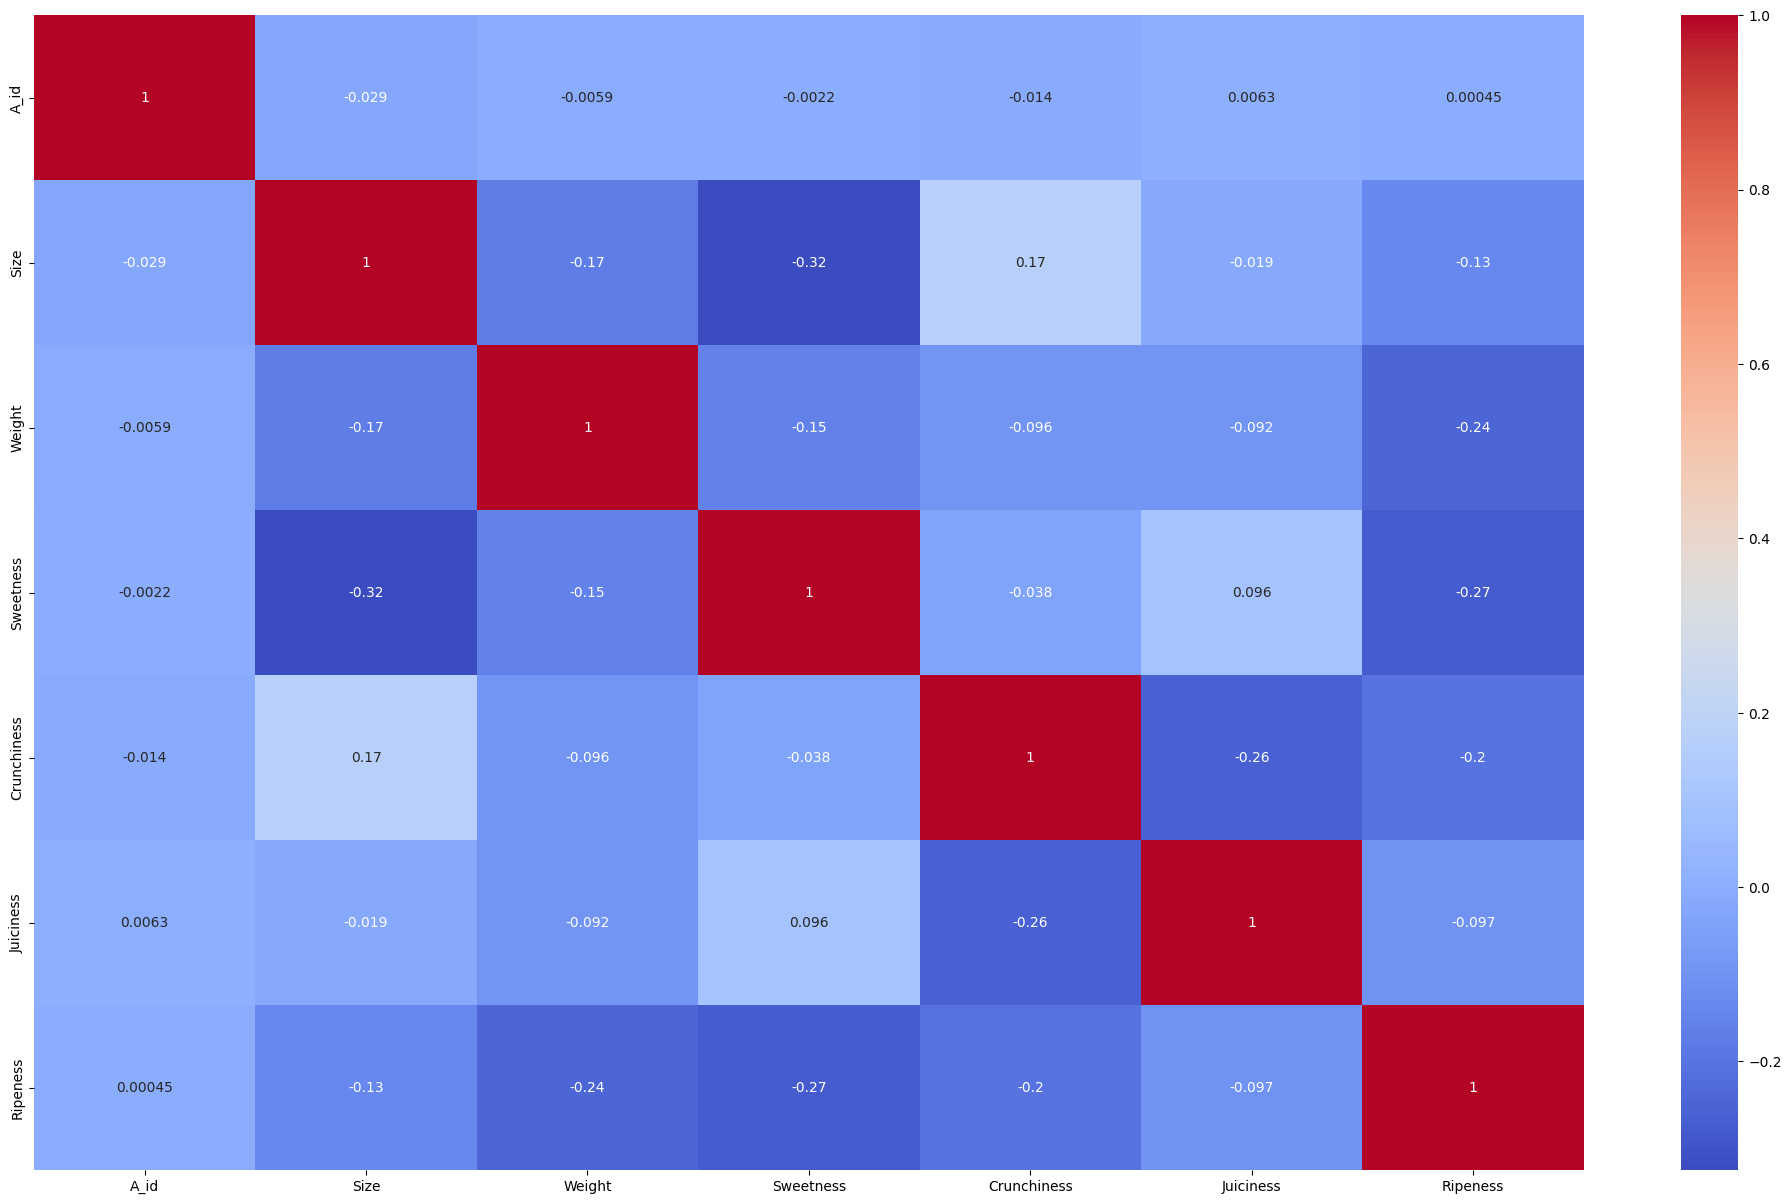

In [ ]:
corr = bsdata.corr()

plt.figure(figsize=(25, 15))
sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.show()

In [ ]:
from sklearn.preprocessing import LabelEncoder
LE=LabelEncoder()
bsdata['Acidity']=LE.fit_transform(bsdata['Acidity'])

In [ ]:
from sklearn.preprocessing import LabelEncoder
LE=LabelEncoder()
bsdata['Quality']=LE.fit_transform(bsdata['Quality'])

In [ ]:
bsdata.columns

Index(['A_id', 'Size', 'Weight', 'Sweetness', 'Crunchiness', 'Juiciness',
       'Ripeness', 'Acidity', 'Quality'],
      dtype='object')

In [ ]:
cols=['A_id', 'Size', 'Weight', 'Sweetness', 'Crunchiness', 'Juiciness',
       'Ripeness', 'Acidity', 'Quality']
bs=bsdata[cols]
bs.corr()

,A_id,Size,Weight,Sweetness,Crunchiness,Juiciness,Ripeness,Acidity,Quality
A_id,1.000000,-0.028724,-0.005923,-0.002246,-0.013762,0.006346,0.000447,-0.010768,0.005305
Size,-0.028724,1.000000,-0.170740,-0.324639,0.169661,-0.018852,-0.134831,0.092068,0.244073
Weight,-0.005923,-0.170740,1.000000,-0.154275,-0.095679,-0.092303,-0.243727,0.016184,0.001308
Sweetness,-0.002246,-0.324639,-0.154275,1.000000,-0.037657,0.095908,-0.273833,0.093220,0.251040
Crunchiness,-0.013762,0.169661,-0.095679,-0.037657,1.000000,-0.259676,-0.201652,-0.015158,-0.012751
Juiciness,0.006346,-0.018852,-0.092303,0.095908,-0.259676,1.000000,-0.097203,0.252450,0.260283
Ripeness,0.000447,-0.134831,-0.243727,-0.273833,-0.201652,-0.097203,1.000000,-0.196333,-0.264436
Acidity,-0.010768,0.092068,0.016184,0.093220,-0.015158,0.252450,-0.196333,1.000000,-0.012321
Quality,0.005305,0.244073,0.001308,0.251040,-0.012751,0.260283,-0.264436,-0.012321,1.000000


In [ ]:
# Display descriptive statistics
bsdata.describe()

,A_id,Size,Weight,Sweetness,Crunchiness,Juiciness,Ripeness,Acidity,Quality
count,4001.000000,4001.000000,4001.000000,4001.000000,4001.000000,4001.000000,4001.000000,4001.000000,4001.000000
mean,1999.999750,-0.502819,-0.989728,-0.470331,0.984943,0.512307,0.497959,2000.000000,0.501125
std,1155.133109,1.927857,1.602348,1.943220,1.402990,1.930081,1.874301,1155.133542,0.500061
min,0.000000,-7.151703,-7.149848,-6.894485,-6.055058,-5.961897,-5.864599,0.000000,0.000000
25%,1000.000000,-1.816202,-2.011767,-1.738424,0.062463,-0.801238,-0.773796,1000.000000,0.000000
50%,2000.000000,-0.513569,-0.984984,-0.504307,0.997933,0.534934,0.502737,2000.000000,1.000000
75%,3000.000000,0.805329,0.029773,0.801810,1.893586,1.835903,1.765281,3000.000000,1.000000
max,3999.000000,6.406367,5.790714,6.374916,7.619852,7.364403,7.237837,4000.000000,1.000000


In [ ]:
# Finding Correlation Between Target and Remaining Variables
bsdata.corrwith(bsdata['Quality'])

A_id           0.005305
Size           0.244073
Weight         0.001308
Sweetness      0.251040
Crunchiness   -0.012751
Juiciness      0.260283
Ripeness      -0.264436
Acidity       -0.012321
Quality        1.000000
dtype: float64

In [ ]:
bsdata1=bsdata.drop(columns=['A_id'])

In [ ]:
bsdata1.columns

Index(['Size', 'Weight', 'Sweetness', 'Crunchiness', 'Juiciness', 'Ripeness',
       'Acidity', 'Quality'],
      dtype='object')

In [ ]:
cols1=['Size', 'Weight', 'Sweetness', 'Crunchiness', 'Juiciness', 'Ripeness',
       'Acidity', 'Quality']

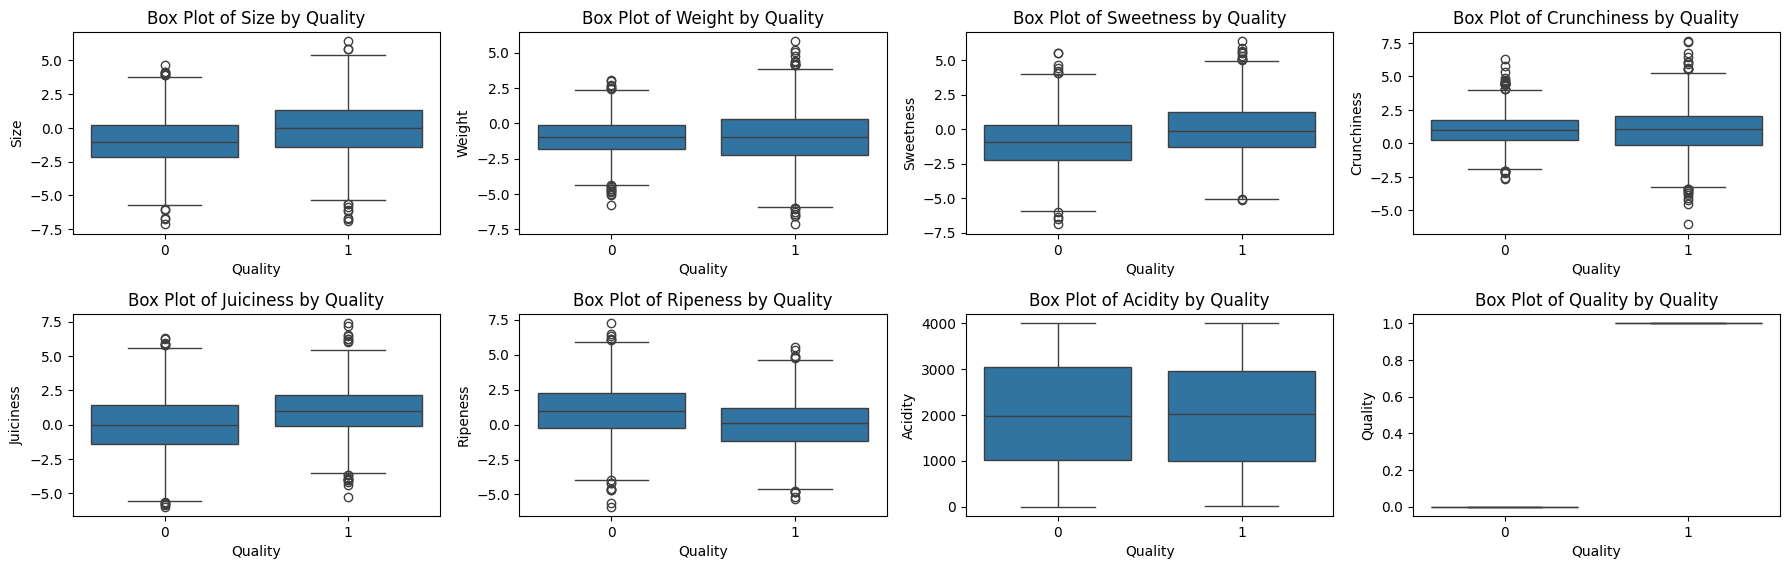

In [ ]:
#boxplot to detect outliers
plt.figure(figsize=(18,11))
for i,col in enumerate(cols1):
  plt.subplot(4,4,i+1)
  sns.boxplot(x='Quality',y=col,data=bsdata1)
  plt.title(f'Box Plot of {col} by Quality')
  plt.xlabel('Quality')
  plt.ylabel(col)

plt.tight_layout()
plt.show()


In [ ]:
# Function to detect and remove outliers using IQR
def remove_outliers_iqr(bsdata1):
    Q1 = bsdata1.quantile(0.25)
    Q3 = bsdata1.quantile(0.75)
    IQR = Q3 - Q1
    return bsdata1[~((bsdata1 < (Q1 - 1.5 * IQR)) | (bsdata1 > (Q3 + 1.5 * IQR))).any(axis=1)]

# Detect and remove outliers using IQR
bsdata2 = remove_outliers_iqr(bsdata1)

# Print the DataFrame without outliers using IQR
print(bsdata2)


          Size    Weight  Sweetness  Crunchiness  Juiciness  Ripeness  \
1    -1.195217 -2.839257   3.664059     1.588232   0.853286  0.867530   
2    -0.292024 -1.351282  -1.738429    -0.342616   2.838636 -0.038033   
3    -0.657196 -2.271627   1.324874    -0.097875   3.637970 -3.413761   
4     1.364217 -1.296612  -0.384658    -0.553006   3.030874 -1.303849   
5    -3.425400 -1.409082  -1.913511    -0.555775  -3.853071  1.914616   
...        ...       ...        ...          ...        ...       ...   
3996 -0.293118  1.949253  -0.204020    -0.640196   0.024523 -1.087900   
3997 -2.634515 -2.138247  -2.440461     0.657223   2.199709  4.763859   
3998 -4.008004 -1.779337   2.366397    -0.200329   2.161435  0.214488   
3999  0.278540 -1.715505   0.121217    -1.154075   1.266677 -0.776571   
4000  0.278540 -1.715505   0.121217    -1.154075   1.266677 -0.776571   

      Acidity  Quality  
1         550        1  
2        3543        0  
3        2550        1  
4        2344        1 

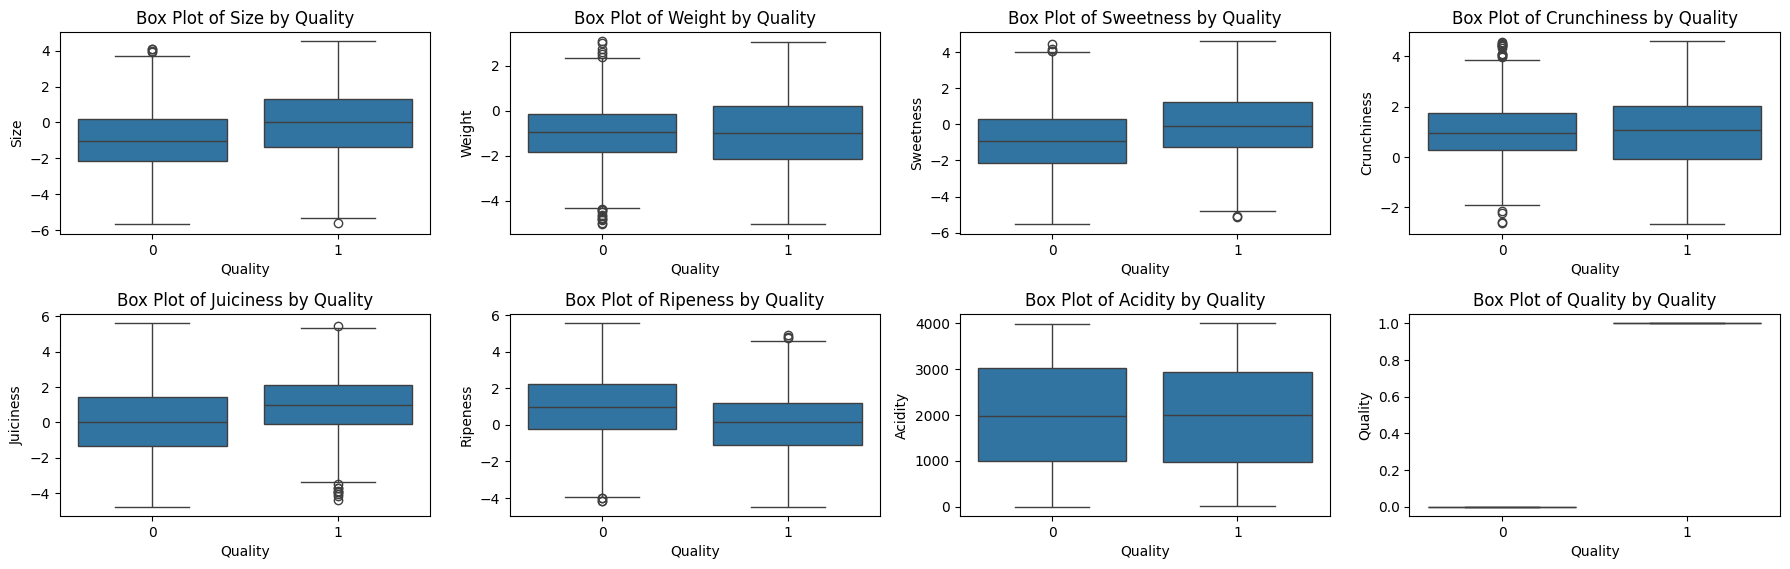

In [ ]:
#boxplot to detect outliers
plt.figure(figsize=(18,11))
for i,col in enumerate(cols1):
  plt.subplot(4,4,i+1)
  sns.boxplot(x='Quality',y=col,data=bsdata2)
  plt.title(f'Box Plot of {col} by Quality')
  plt.xlabel('Quality')
  plt.ylabel(col)

plt.tight_layout()
plt.show()


In [ ]:
#Step -10
# identify the Independent and Target (dependent variables)
IndepVar = []
for col in bsdata2.columns:
    if col != 'Quality':
        IndepVar.append(col)
TargetVar = 'Quality'
x = bsdata2[IndepVar]
y = bsdata2[TargetVar]

In [ ]:
#Step -11
# Splitting the dataset into train and test

from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.30, random_state = 42)

# Display the shape

x_train.shape, x_test.shape, y_train.shape, y_test.shape

((2665, 7), (1143, 7), (2665,), (1143,))

In [ ]:
bsdata2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3808 entries, 1 to 4000
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Size         3808 non-null   float64
 1   Weight       3808 non-null   float64
 2   Sweetness    3808 non-null   float64
 3   Crunchiness  3808 non-null   float64
 4   Juiciness    3808 non-null   float64
 5   Ripeness     3808 non-null   float64
 6   Acidity      3808 non-null   int64  
 7   Quality      3808 non-null   int64  
dtypes: float64(6), int64(2)
memory usage: 267.8 KB


In [ ]:
bsdata2.columns

Index(['Size', 'Weight', 'Sweetness', 'Crunchiness', 'Juiciness', 'Ripeness',
       'Acidity', 'Quality'],
      dtype='object')

In [ ]:

from google.colab import files
bsdata2.to_csv('preprocessed_apple.csv', index=False)

# Download the file
files.download('preprocessed_apple.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
cols2=['Size', 'Weight', 'Sweetness', 'Crunchiness', 'Juiciness', 'Ripeness',
       'Acidity']

In [ ]:
#Step -12
# Scaling the features by using MinMaxScaler

from sklearn.preprocessing import MinMaxScaler

mmscaler = MinMaxScaler(feature_range=(0, 1))

x_train[cols2] = mmscaler.fit_transform(x_train[cols2])
x_train = pd.DataFrame(x_train)

x_test[cols2] = mmscaler.fit_transform(x_test[cols2])
x_test = pd.DataFrame(x_test)


In [ ]:
#Load the result file for SVM
SVMResults=pd.read_csv(r"/content/drive/MyDrive/EMResults.csv",header=0)
#Display the  first five records
SVMResults.head()

,Model Name,True_Positive,False_Negative,False_Positive,True_Negative,Accuracy,Precision,Recall,F1 Score,Specificity,MCC,ROC_AUC_Score,Balanced Accuracy


Model Name:  SVM - Linear
Confusion matrix : 
 [[416 144]
 [170 413]]
Outcome values : 
 416 144 170 413
Classification report : 
               precision    recall  f1-score   support

           1       0.71      0.74      0.73       560
           0       0.74      0.71      0.72       583

    accuracy                           0.73      1143
   macro avg       0.73      0.73      0.73      1143
weighted avg       0.73      0.73      0.73      1143

Accuracy : 72.5 %
Precision : 71.0 %
Recall : 74.3 %
F1 Score : 0.726
Specificity or True Negative Rate : 70.8 %
Balanced Accuracy : 72.6 %
MCC : 0.451
roc_auc_score: 0.726


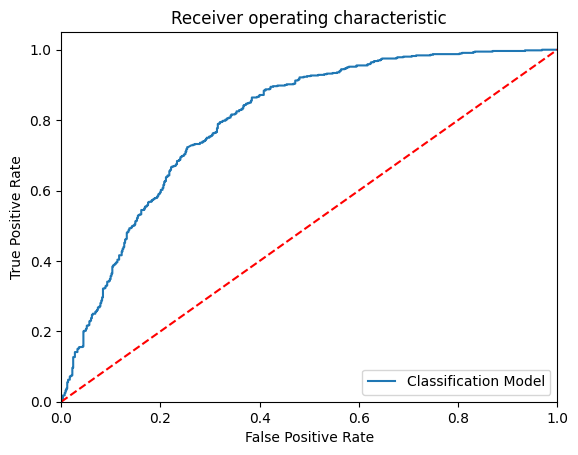

In [ ]:
# Training the SVM algorithm with train dataset

from sklearn.svm import SVC

ModelSVM1 = SVC(C=1.0, kernel='linear', degree=3, gamma='scale', coef0=0.0, shrinking=True,
                probability=True, tol=0.001, cache_size=200, class_weight=None, verbose=False,
                max_iter=- 1, decision_function_shape='ovr', break_ties=False, random_state=None)

# Train the model with train data

ModelSVM1 = ModelSVM1.fit(x_train, y_train)

# Predict the model with test data set

y_pred = ModelSVM1.predict(x_test)
y_pred_prob = ModelSVM1.predict_proba(x_test)

# Print the model name

print('Model Name: ', "SVM - Linear")

# Confusion matrix in sklearn

from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

# actual values

actual = y_test

# predicted values

predicted = y_pred

# confusion matrix

matrix = confusion_matrix(actual,predicted, labels=[1,0],sample_weight=None, normalize=None)
print('Confusion matrix : \n', matrix)

# outcome values order in sklearn

tp, fn, fp, tn = confusion_matrix(actual,predicted,labels=[1,0]).reshape(-1)
print('Outcome values : \n', tp, fn, fp, tn)

# classification report for precision, recall f1-score and accuracy

C_Report = classification_report(actual,predicted,labels=[1,0])

print('Classification report : \n', C_Report)

# calculating the metrics

sensitivity = round(tp/(tp+fn), 3);
specificity = round(tn/(tn+fp), 3);
accuracy = round((tp+tn)/(tp+fp+tn+fn), 3);
balanced_accuracy = round((sensitivity+specificity)/2, 3);
precision = round(tp/(tp+fp), 3);
f1Score = round((2*tp/(2*tp + fp + fn)), 3);

# Matthews Correlation Coefficient (MCC). Range of values of MCC lie between -1 to +1.
# A model with a score of +1 is a perfect model and -1 is a poor model

from math import sqrt

mx = (tp+fp) * (tp+fn) * (tn+fp) * (tn+fn)
MCC = round(((tp * tn) - (fp * fn)) / sqrt(mx), 3)

print('Accuracy :', round(accuracy*100, 2),'%')
print('Precision :', round(precision*100, 2),'%')
print('Recall :', round(sensitivity*100,2), '%')
print('F1 Score :', f1Score)
print('Specificity or True Negative Rate :', round(specificity*100,2), '%'  )
print('Balanced Accuracy :', round(balanced_accuracy*100, 2),'%')
print('MCC :', MCC)

# Area under ROC curve

from sklearn.metrics import roc_curve, roc_auc_score

print('roc_auc_score:', round(roc_auc_score(actual, predicted), 3))

# ROC Curve

from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
model_roc_auc = roc_auc_score(actual, predicted)
fpr, tpr, thresholds = roc_curve(actual,ModelSVM1.predict_proba(x_test)[:,1])
plt.figure()
# plt.plot(fpr, tpr, label='Logistic Regression (area = %0.2f)' % logit_roc_auc)
plt.plot(fpr, tpr, label= 'Classification Model' % model_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('Log_ROC')
plt.show()
new_row = {'Model Name' : "SVM - Linear",
            'True_Positive' : tp,
            'False_Negative' : fn,
            'False_Positive' : fp,
            'True_Negative' : tn,
            'Accuracy' : accuracy,
            'Precision' : precision,
            'Recall' : sensitivity,
            'F1 Score' : f1Score,
            'Specificity' : specificity,
            'MCC':MCC,
            'ROC_AUC_Score':roc_auc_score(actual, predicted),
            'Balanced Accuracy':balanced_accuracy}
SVMResults = SVMResults.append(new_row, ignore_index=True)
#-----------------------------------------------------------------------------------------------------------

In [ ]:
#Display the results of SVM Algorithm
SVMResults

,Model Name,True_Positive,False_Negative,False_Positive,True_Negative,Accuracy,Precision,Recall,F1 Score,Specificity,MCC,ROC_AUC_Score,Balanced Accuracy
0,SVM - Linear,416,144,170,413,0.725,0.71,0.743,0.726,0.708,0.451,0.725631,0.726


Model Name:  SVM - Polynominal
Confusion matrix : 
 [[458 102]
 [103 480]]
Outcome values : 
 458 102 103 480
Classification report : 
               precision    recall  f1-score   support

           1       0.82      0.82      0.82       560
           0       0.82      0.82      0.82       583

    accuracy                           0.82      1143
   macro avg       0.82      0.82      0.82      1143
weighted avg       0.82      0.82      0.82      1143

Accuracy : 82.1 %
Precision : 81.6 %
Recall : 81.8 %
F1 Score : 0.817
Specificity or True Negative Rate : 82.3 %
Balanced Accuracy : 82.0 %
MCC : 0.641
roc_auc_score: 0.821


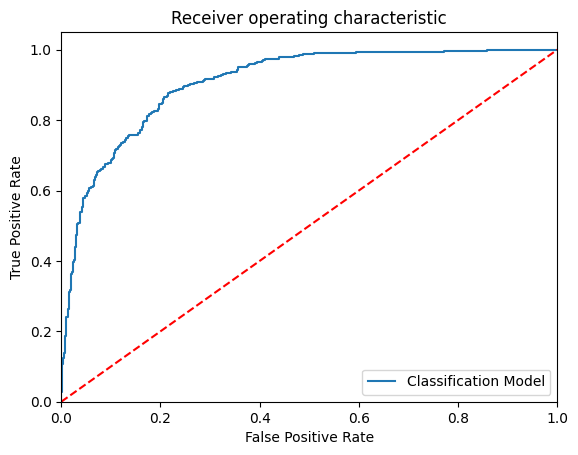

In [ ]:
# Training the SVM algorithm

from sklearn.svm import SVC

ModelSVMPoly = SVC(kernel='poly', degree=2, probability=True)

# Train the model

ModelSVMPoly.fit(x_train, y_train)

# Predict the model with test data set

y_pred = ModelSVMPoly.predict(x_test)
y_pred_prob = ModelSVMPoly.predict_proba(x_test)

# Print the model name

print('Model Name: ', "SVM - Polynominal")

# Confusion matrix in sklearn

from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

# actual values

actual = y_test

# predicted values

predicted = y_pred

# confusion matrix

matrix = confusion_matrix(actual,predicted, labels=[1,0],sample_weight=None, normalize=None)
print('Confusion matrix : \n', matrix)

# outcome values order in sklearn

tp, fn, fp, tn = confusion_matrix(actual,predicted,labels=[1,0]).reshape(-1)
print('Outcome values : \n', tp, fn, fp, tn)

# classification report for precision, recall f1-score and accuracy

C_Report = classification_report(actual,predicted,labels=[1,0])

print('Classification report : \n', C_Report)

# calculating the metrics

sensitivity = round(tp/(tp+fn), 3);
specificity = round(tn/(tn+fp), 3);
accuracy = round((tp+tn)/(tp+fp+tn+fn), 3);
balanced_accuracy = round((sensitivity+specificity)/2, 3);
precision = round(tp/(tp+fp), 3);
f1Score = round((2*tp/(2*tp + fp + fn)), 3);

# Matthews Correlation Coefficient (MCC). Range of values of MCC lie between -1 to +1.
# A model with a score of +1 is a perfect model and -1 is a poor model

from math import sqrt

mx = (tp+fp) * (tp+fn) * (tn+fp) * (tn+fn)
MCC = round(((tp * tn) - (fp * fn)) / sqrt(mx), 3)

print('Accuracy :', round(accuracy*100, 2),'%')
print('Precision :', round(precision*100, 2),'%')
print('Recall :', round(sensitivity*100,2), '%')
print('F1 Score :', f1Score)
print('Specificity or True Negative Rate :', round(specificity*100,2), '%'  )
print('Balanced Accuracy :', round(balanced_accuracy*100, 2),'%')
print('MCC :', MCC)

# Area under ROC curve

from sklearn.metrics import roc_curve, roc_auc_score

print('roc_auc_score:', round(roc_auc_score(y_test, y_pred), 3))

# ROC Curve

from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
logit_roc_auc = roc_auc_score(y_test, y_pred)
fpr, tpr, thresholds = roc_curve(y_test,ModelSVMPoly.predict_proba(x_test)[:,1])
plt.figure()
# plt.plot
plt.plot(fpr, tpr, label= 'Classification Model' % logit_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('Log_ROC')
plt.show()
new_row = {'Model Name' : "SVM - Polynomial",
            'True_Positive' : tp,
            'False_Negative' : fn,
            'False_Positive' : fp,
            'True_Negative' : tn,
            'Accuracy' : accuracy,
            'Precision' : precision,
            'Recall' : sensitivity,
            'F1 Score' : f1Score,
            'Specificity' : specificity,
            'MCC':MCC,
            'ROC_AUC_Score':roc_auc_score(actual, predicted),
            'Balanced Accuracy':balanced_accuracy}
SVMResults = SVMResults.append(new_row, ignore_index=True)
#-----------------------------------------------------------------------------------------------------------

In [ ]:
#Display the results of SVM Algorithm
SVMResults

,Model Name,True_Positive,False_Negative,False_Positive,True_Negative,Accuracy,Precision,Recall,F1 Score,Specificity,MCC,ROC_AUC_Score,Balanced Accuracy
0,SVM - Linear,416,144,170,413,0.725,0.710,0.743,0.726,0.708,0.451,0.725631,0.726
1,SVM - Polynomial,458,102,103,480,0.821,0.816,0.818,0.817,0.823,0.641,0.820592,0.820


Model Name:  SVM - Gaussian
Confusion matrix : 
 [[492  68]
 [ 71 512]]
Outcome values : 
 492 68 71 512
Classification report : 
               precision    recall  f1-score   support

           1       0.87      0.88      0.88       560
           0       0.88      0.88      0.88       583

    accuracy                           0.88      1143
   macro avg       0.88      0.88      0.88      1143
weighted avg       0.88      0.88      0.88      1143

Accuracy : 87.8 %
Precision : 87.4 %
Recall : 87.9 %
F1 Score : 0.876
Specificity or True Negative Rate : 87.8 %
Balanced Accuracy : 87.9 %
MCC : 0.757
roc_auc_score: 0.878


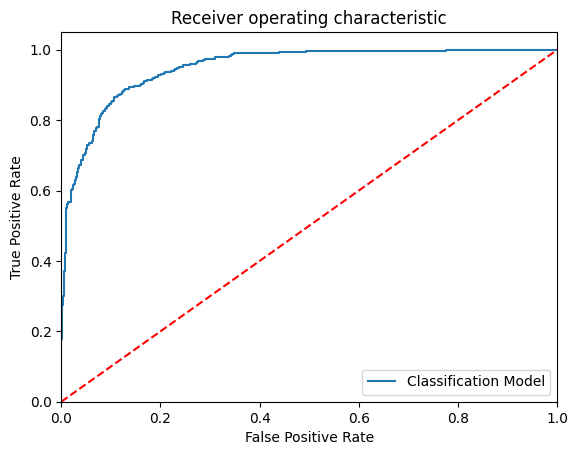

In [ ]:
# Training the SVM algorithm

from sklearn.svm import SVC

ModelSVMGaussian = SVC(kernel='rbf', random_state = 42, class_weight='balanced', probability=True)

# Train the model

ModelSVMGaussian.fit(x_train, y_train)

# Predict the model with test data set

y_pred = ModelSVMGaussian.predict(x_test)
y_pred_prob = ModelSVMGaussian.predict_proba(x_test)

# Confusion matrix in sklearn

from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

# Print the model name

print('Model Name: ', "SVM - Gaussian")

# actual values

actual = y_test

# predicted values

predicted = y_pred

# confusion matrix

matrix = confusion_matrix(actual,predicted, labels=[1,0],sample_weight=None, normalize=None)
print('Confusion matrix : \n', matrix)

# outcome values order in sklearn

tp, fn, fp, tn = confusion_matrix(actual,predicted,labels=[1,0]).reshape(-1)
print('Outcome values : \n', tp, fn, fp, tn)

# classification report for precision, recall f1-score and accuracy

C_Report = classification_report(actual,predicted,labels=[1,0])

print('Classification report : \n', C_Report)

# calculating the metrics

sensitivity = round(tp/(tp+fn), 3);
specificity = round(tn/(tn+fp), 3);
accuracy = round((tp+tn)/(tp+fp+tn+fn), 3);
balanced_accuracy = round((sensitivity+specificity)/2, 3);
precision = round(tp/(tp+fp), 3);
f1Score = round((2*tp/(2*tp + fp + fn)), 3);

# Matthews Correlation Coefficient (MCC). Range of values of MCC lie between -1 to +1.
# A model with a score of +1 is a perfect model and -1 is a poor model

from math import sqrt

mx = (tp+fp) * (tp+fn) * (tn+fp) * (tn+fn)
MCC = round(((tp * tn) - (fp * fn)) / sqrt(mx), 3)

print('Accuracy :', round(accuracy*100, 2),'%')
print('Precision :', round(precision*100, 2),'%')
print('Recall :', round(sensitivity*100,2), '%')
print('F1 Score :', f1Score)
print('Specificity or True Negative Rate :', round(specificity*100,2), '%'  )
print('Balanced Accuracy :', round(balanced_accuracy*100, 2),'%')
print('MCC :', MCC)

# Area under ROC curve

from sklearn.metrics import roc_curve, roc_auc_score

print('roc_auc_score:', round(roc_auc_score(y_test, y_pred), 3))

# ROC Curve

from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
logit_roc_auc = roc_auc_score(y_test, y_pred)
fpr, tpr, thresholds = roc_curve(y_test,ModelSVMGaussian.predict_proba(x_test)[:,1])
plt.figure()
# plt.plot
plt.plot(fpr, tpr, label= 'Classification Model' % logit_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('Log_ROC')
plt.show()
new_row = {'Model Name' : "SVM - Gaussian",
            'True_Positive' : tp,
            'False_Negative' : fn,
            'False_Positive' : fp,
            'True_Negative' : tn,
            'Accuracy' : accuracy,
            'Precision' : precision,
            'Recall' : sensitivity,
            'F1 Score' : f1Score,
            'Specificity' : specificity,
            'MCC':MCC,
            'ROC_AUC_Score':roc_auc_score(actual, predicted),
            'Balanced Accuracy':balanced_accuracy}
SVMResults = SVMResults.append(new_row, ignore_index=True)
#-----------------------------------------------------------------------------------------------------------

Model Name:  SVM - Sigmoid
Confusion matrix : 
 [[  1 559]
 [  0 583]]
Outcome values : 
 1 559 0 583
Classification report : 
               precision    recall  f1-score   support

           1       1.00      0.00      0.00       560
           0       0.51      1.00      0.68       583

    accuracy                           0.51      1143
   macro avg       0.76      0.50      0.34      1143
weighted avg       0.75      0.51      0.35      1143

Accuracy : 51.1 %
Precision : 100.0 %
Recall : 0.2 %
F1 Score : 0.004
Specificity or True Negative Rate : 100.0 %
Balanced Accuracy : 50.1 %
MCC : 0.03
roc_auc_score: 0.501


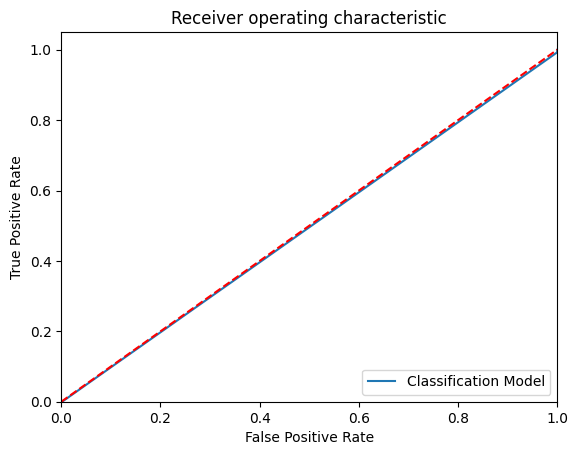

In [ ]:

# Training the SVM algorithm

from sklearn.svm import SVC

ModelSVMSig = SVC(kernel='sigmoid', random_state = 42, class_weight='balanced', probability=True)

# Train the model

ModelSVMSig.fit(x_train, y_train)

# Predict the model with test data set

y_pred = ModelSVMSig.predict(x_test)
y_pred_prob = ModelSVMSig.predict_proba(x_test)

# Print the model name

print('Model Name: ', "SVM - Sigmoid")

# Confusion matrix in sklearn

from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

# actual values

actual = y_test

# predicted values

predicted = y_pred

# confusion matrix

matrix = confusion_matrix(actual,predicted, labels=[1,0],sample_weight=None, normalize=None)
print('Confusion matrix : \n', matrix)

# outcome values order in sklearn

tp, fn, fp, tn = confusion_matrix(actual,predicted,labels=[1,0]).reshape(-1)
print('Outcome values : \n', tp, fn, fp, tn)

# classification report for precision, recall f1-score and accuracy

C_Report = classification_report(actual,predicted,labels=[1,0])

print('Classification report : \n', C_Report)

# calculating the metrics

sensitivity = round(tp/(tp+fn), 3);
specificity = round(tn/(tn+fp), 3);
accuracy = round((tp+tn)/(tp+fp+tn+fn), 3);
balanced_accuracy = round((sensitivity+specificity)/2, 3);
precision = round(tp/(tp+fp), 3);
f1Score = round((2*tp/(2*tp + fp + fn)), 3);

# Matthews Correlation Coefficient (MCC). Range of values of MCC lie between -1 to +1.
# A model with a score of +1 is a perfect model and -1 is a poor model

from math import sqrt

mx = (tp+fp) * (tp+fn) * (tn+fp) * (tn+fn)
MCC = round(((tp * tn) - (fp * fn)) / sqrt(mx), 3)

print('Accuracy :', round(accuracy*100, 2),'%')
print('Precision :', round(precision*100, 2),'%')
print('Recall :', round(sensitivity*100,2), '%')
print('F1 Score :', f1Score)
print('Specificity or True Negative Rate :', round(specificity*100,2), '%'  )
print('Balanced Accuracy :', round(balanced_accuracy*100, 2),'%')
print('MCC :', MCC)

# Area under ROC curve

from sklearn.metrics import roc_curve, roc_auc_score

print('roc_auc_score:', round(roc_auc_score(y_test, y_pred), 3))

# ROC Curve

from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
logit_roc_auc = roc_auc_score(y_test, y_pred)
fpr, tpr, thresholds = roc_curve(y_test,ModelSVMSig.predict_proba(x_test)[:,1])
plt.figure()
# plt.plot
plt.plot(fpr, tpr, label= 'Classification Model' % logit_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('Log_ROC')
plt.show()
new_row = {'Model Name' : "SVM - Sigmoid",
            'True_Positive' : tp,
            'False_Negative' : fn,
            'False_Positive' : fp,
            'True_Negative' : tn,
            'Accuracy' : accuracy,
            'Precision' : precision,
            'Recall' : sensitivity,
            'F1 Score' : f1Score,
            'Specificity' : specificity,
            'MCC':MCC,
            'ROC_AUC_Score':roc_auc_score(actual, predicted),
            'Balanced Accuracy':balanced_accuracy}
SVMResults = SVMResults.append(new_row, ignore_index=True)
#-----------------------------------------------------------------------------------------------------------

In [ ]:
#Display the results of SVM Algorithm
SVMResults

,Model Name,True_Positive,False_Negative,False_Positive,True_Negative,Accuracy,Precision,Recall,F1 Score,Specificity,MCC,ROC_AUC_Score,Balanced Accuracy
0,SVM - Linear,416,144,170,413,0.725,0.710,0.743,0.726,0.708,0.451,0.725631,0.726
1,SVM - Polynomial,458,102,103,480,0.821,0.816,0.818,0.817,0.823,0.641,0.820592,0.820
2,SVM - Gaussian,492,68,71,512,0.878,0.874,0.879,0.876,0.878,0.757,0.878394,0.879
3,SVM - Sigmoid,1,559,0,583,0.511,1.000,0.002,0.004,1.000,0.030,0.500893,0.501


In [ ]:
#Load the result file for KNN
KNNResults=pd.read_csv(r"/content/drive/MyDrive/KNN_Results.csv",header=0)
#Display the  first five records
KNNResults.head()

,Model Name,KNN K Value,True_Positive,False_Negative,False_Positive,True_Negative,Accuracy,Precision,Recall,F1 Score,Specificity,MCC,ROC_AUC_Score,Balanced Accuracy


KNN_K_value =  1
Model Name:  KNeighborsClassifier(n_neighbors=1)
Confusion matrix : 
 [[478  82]
 [ 77 506]]
Outcome values : 
 478 82 77 506
Classification report : 
               precision    recall  f1-score   support

           1       0.86      0.85      0.86       560
           0       0.86      0.87      0.86       583

    accuracy                           0.86      1143
   macro avg       0.86      0.86      0.86      1143
weighted avg       0.86      0.86      0.86      1143

Accuracy : 86.1 %
Precision : 86.1 %
Recall : 85.4 %
F1 Score : 0.857
Specificity or True Negative Rate : 86.8 %
Balanced Accuracy : 86.1 %
MCC : 0.722
roc_auc_score: 0.861


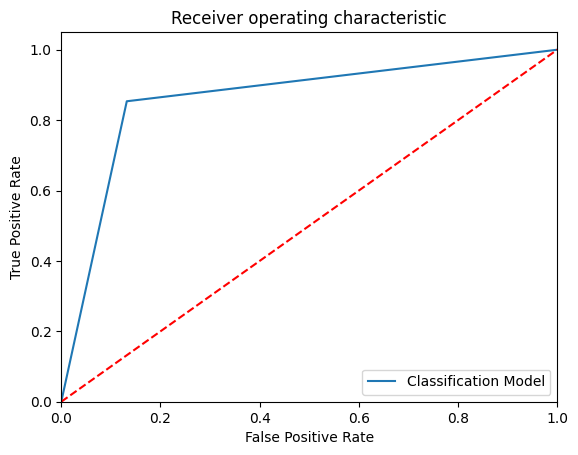

KNN_K_value =  2
Model Name:  KNeighborsClassifier(n_neighbors=2)
Confusion matrix : 
 [[407 153]
 [ 34 549]]
Outcome values : 
 407 153 34 549
Classification report : 
               precision    recall  f1-score   support

           1       0.92      0.73      0.81       560
           0       0.78      0.94      0.85       583

    accuracy                           0.84      1143
   macro avg       0.85      0.83      0.83      1143
weighted avg       0.85      0.84      0.83      1143

Accuracy : 83.6 %
Precision : 92.3 %
Recall : 72.7 %
F1 Score : 0.813
Specificity or True Negative Rate : 94.2 %
Balanced Accuracy : 83.4 %
MCC : 0.686
roc_auc_score: 0.834


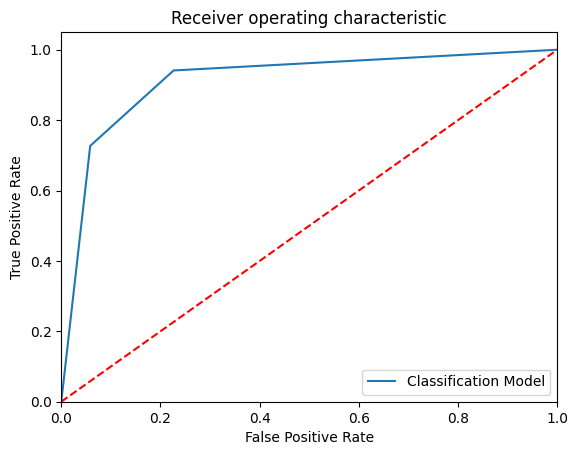

KNN_K_value =  3
Model Name:  KNeighborsClassifier(n_neighbors=3)
Confusion matrix : 
 [[481  79]
 [ 62 521]]
Outcome values : 
 481 79 62 521
Classification report : 
               precision    recall  f1-score   support

           1       0.89      0.86      0.87       560
           0       0.87      0.89      0.88       583

    accuracy                           0.88      1143
   macro avg       0.88      0.88      0.88      1143
weighted avg       0.88      0.88      0.88      1143

Accuracy : 87.7 %
Precision : 88.6 %
Recall : 85.9 %
F1 Score : 0.872
Specificity or True Negative Rate : 89.4 %
Balanced Accuracy : 87.6 %
MCC : 0.753
roc_auc_score: 0.876


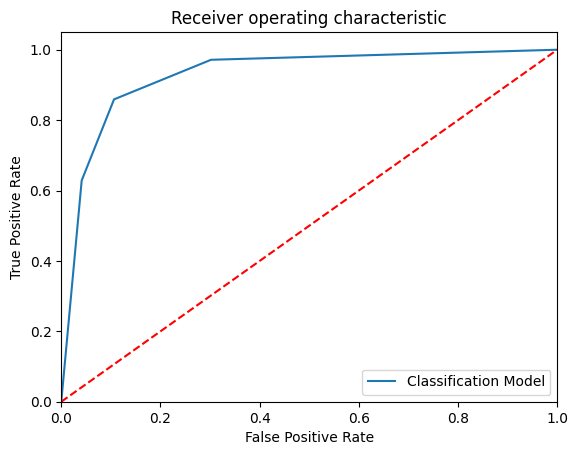

KNN_K_value =  4
Model Name:  KNeighborsClassifier(n_neighbors=4)
Confusion matrix : 
 [[443 117]
 [ 37 546]]
Outcome values : 
 443 117 37 546
Classification report : 
               precision    recall  f1-score   support

           1       0.92      0.79      0.85       560
           0       0.82      0.94      0.88       583

    accuracy                           0.87      1143
   macro avg       0.87      0.86      0.86      1143
weighted avg       0.87      0.87      0.86      1143

Accuracy : 86.5 %
Precision : 92.3 %
Recall : 79.1 %
F1 Score : 0.852
Specificity or True Negative Rate : 93.7 %
Balanced Accuracy : 86.4 %
MCC : 0.737
roc_auc_score: 0.864


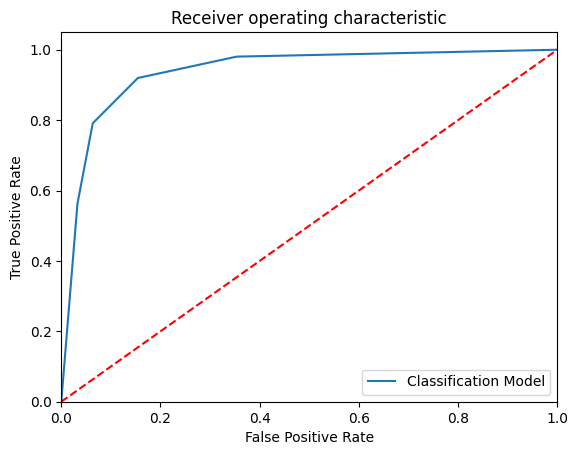

KNN_K_value =  5
Model Name:  KNeighborsClassifier()
Confusion matrix : 
 [[490  70]
 [ 60 523]]
Outcome values : 
 490 70 60 523
Classification report : 
               precision    recall  f1-score   support

           1       0.89      0.88      0.88       560
           0       0.88      0.90      0.89       583

    accuracy                           0.89      1143
   macro avg       0.89      0.89      0.89      1143
weighted avg       0.89      0.89      0.89      1143

Accuracy : 88.6 %
Precision : 89.1 %
Recall : 87.5 %
F1 Score : 0.883
Specificity or True Negative Rate : 89.7 %
Balanced Accuracy : 88.6 %
MCC : 0.772
roc_auc_score: 0.886


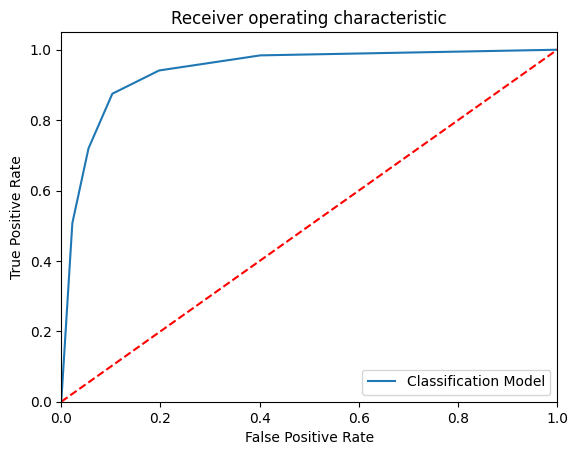

KNN_K_value =  6
Model Name:  KNeighborsClassifier(n_neighbors=6)
Confusion matrix : 
 [[464  96]
 [ 45 538]]
Outcome values : 
 464 96 45 538
Classification report : 
               precision    recall  f1-score   support

           1       0.91      0.83      0.87       560
           0       0.85      0.92      0.88       583

    accuracy                           0.88      1143
   macro avg       0.88      0.88      0.88      1143
weighted avg       0.88      0.88      0.88      1143

Accuracy : 87.7 %
Precision : 91.2 %
Recall : 82.9 %
F1 Score : 0.868
Specificity or True Negative Rate : 92.3 %
Balanced Accuracy : 87.6 %
MCC : 0.756
roc_auc_score: 0.876


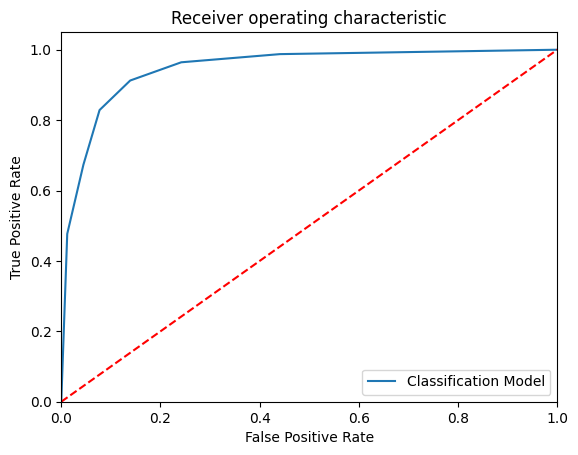

KNN_K_value =  7
Model Name:  KNeighborsClassifier(n_neighbors=7)
Confusion matrix : 
 [[489  71]
 [ 61 522]]
Outcome values : 
 489 71 61 522
Classification report : 
               precision    recall  f1-score   support

           1       0.89      0.87      0.88       560
           0       0.88      0.90      0.89       583

    accuracy                           0.88      1143
   macro avg       0.88      0.88      0.88      1143
weighted avg       0.88      0.88      0.88      1143

Accuracy : 88.5 %
Precision : 88.9 %
Recall : 87.3 %
F1 Score : 0.881
Specificity or True Negative Rate : 89.5 %
Balanced Accuracy : 88.4 %
MCC : 0.769
roc_auc_score: 0.884


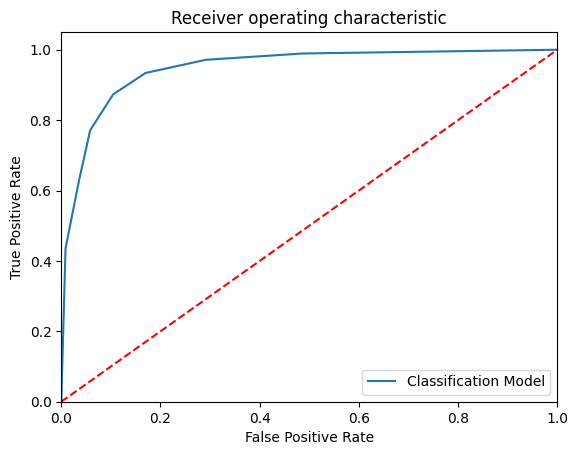

KNN_K_value =  8
Model Name:  KNeighborsClassifier(n_neighbors=8)
Confusion matrix : 
 [[467  93]
 [ 52 531]]
Outcome values : 
 467 93 52 531
Classification report : 
               precision    recall  f1-score   support

           1       0.90      0.83      0.87       560
           0       0.85      0.91      0.88       583

    accuracy                           0.87      1143
   macro avg       0.88      0.87      0.87      1143
weighted avg       0.87      0.87      0.87      1143

Accuracy : 87.3 %
Precision : 90.0 %
Recall : 83.4 %
F1 Score : 0.866
Specificity or True Negative Rate : 91.1 %
Balanced Accuracy : 87.2 %
MCC : 0.748
roc_auc_score: 0.872


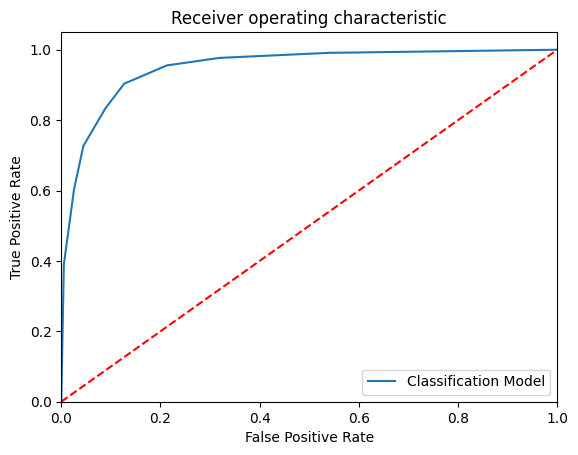

KNN_K_value =  9
Model Name:  KNeighborsClassifier(n_neighbors=9)
Confusion matrix : 
 [[489  71]
 [ 62 521]]
Outcome values : 
 489 71 62 521
Classification report : 
               precision    recall  f1-score   support

           1       0.89      0.87      0.88       560
           0       0.88      0.89      0.89       583

    accuracy                           0.88      1143
   macro avg       0.88      0.88      0.88      1143
weighted avg       0.88      0.88      0.88      1143

Accuracy : 88.4 %
Precision : 88.7 %
Recall : 87.3 %
F1 Score : 0.88
Specificity or True Negative Rate : 89.4 %
Balanced Accuracy : 88.4 %
MCC : 0.767
roc_auc_score: 0.883


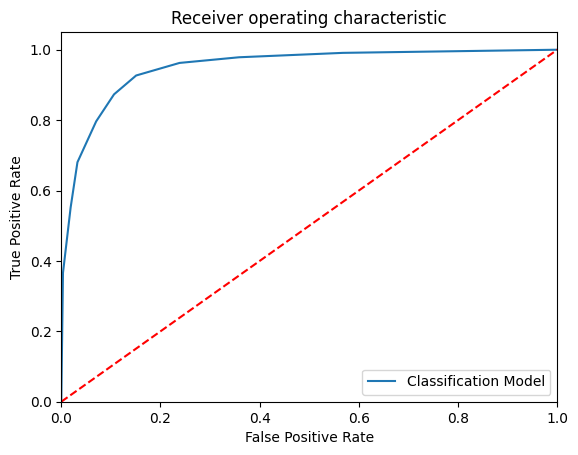

KNN_K_value =  10
Model Name:  KNeighborsClassifier(n_neighbors=10)
Confusion matrix : 
 [[474  86]
 [ 50 533]]
Outcome values : 
 474 86 50 533
Classification report : 
               precision    recall  f1-score   support

           1       0.90      0.85      0.87       560
           0       0.86      0.91      0.89       583

    accuracy                           0.88      1143
   macro avg       0.88      0.88      0.88      1143
weighted avg       0.88      0.88      0.88      1143

Accuracy : 88.1 %
Precision : 90.5 %
Recall : 84.6 %
F1 Score : 0.875
Specificity or True Negative Rate : 91.4 %
Balanced Accuracy : 88.0 %
MCC : 0.763
roc_auc_score: 0.88


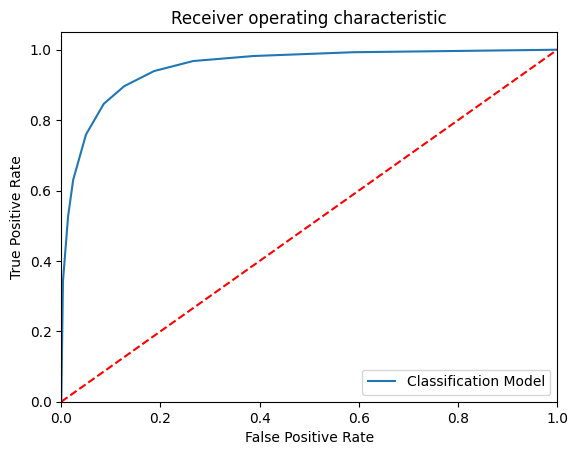

KNN_K_value =  11
Model Name:  KNeighborsClassifier(n_neighbors=11)
Confusion matrix : 
 [[490  70]
 [ 62 521]]
Outcome values : 
 490 70 62 521
Classification report : 
               precision    recall  f1-score   support

           1       0.89      0.88      0.88       560
           0       0.88      0.89      0.89       583

    accuracy                           0.88      1143
   macro avg       0.88      0.88      0.88      1143
weighted avg       0.88      0.88      0.88      1143

Accuracy : 88.5 %
Precision : 88.8 %
Recall : 87.5 %
F1 Score : 0.881
Specificity or True Negative Rate : 89.4 %
Balanced Accuracy : 88.5 %
MCC : 0.769
roc_auc_score: 0.884


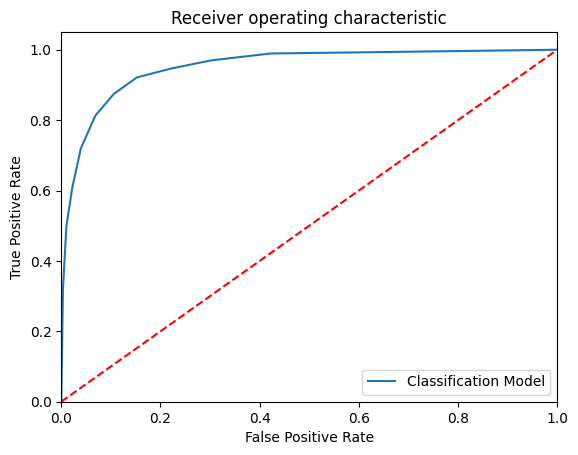

KNN_K_value =  12
Model Name:  KNeighborsClassifier(n_neighbors=12)
Confusion matrix : 
 [[470  90]
 [ 48 535]]
Outcome values : 
 470 90 48 535
Classification report : 
               precision    recall  f1-score   support

           1       0.91      0.84      0.87       560
           0       0.86      0.92      0.89       583

    accuracy                           0.88      1143
   macro avg       0.88      0.88      0.88      1143
weighted avg       0.88      0.88      0.88      1143

Accuracy : 87.9 %
Precision : 90.7 %
Recall : 83.9 %
F1 Score : 0.872
Specificity or True Negative Rate : 91.8 %
Balanced Accuracy : 87.9 %
MCC : 0.76
roc_auc_score: 0.878


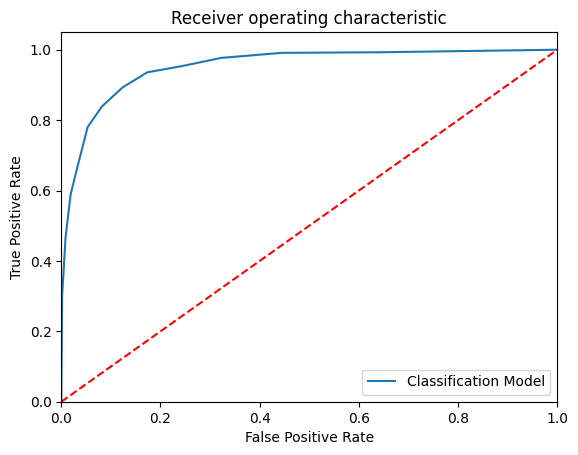

KNN_K_value =  13
Model Name:  KNeighborsClassifier(n_neighbors=13)
Confusion matrix : 
 [[486  74]
 [ 63 520]]
Outcome values : 
 486 74 63 520
Classification report : 
               precision    recall  f1-score   support

           1       0.89      0.87      0.88       560
           0       0.88      0.89      0.88       583

    accuracy                           0.88      1143
   macro avg       0.88      0.88      0.88      1143
weighted avg       0.88      0.88      0.88      1143

Accuracy : 88.0 %
Precision : 88.5 %
Recall : 86.8 %
F1 Score : 0.876
Specificity or True Negative Rate : 89.2 %
Balanced Accuracy : 88.0 %
MCC : 0.76
roc_auc_score: 0.88


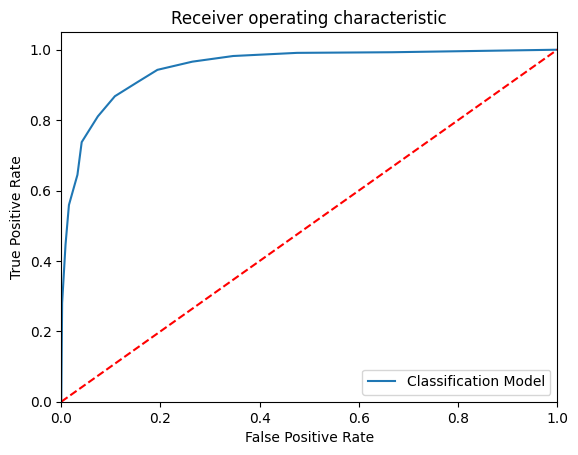

KNN_K_value =  14
Model Name:  KNeighborsClassifier(n_neighbors=14)
Confusion matrix : 
 [[469  91]
 [ 55 528]]
Outcome values : 
 469 91 55 528
Classification report : 
               precision    recall  f1-score   support

           1       0.90      0.84      0.87       560
           0       0.85      0.91      0.88       583

    accuracy                           0.87      1143
   macro avg       0.87      0.87      0.87      1143
weighted avg       0.87      0.87      0.87      1143

Accuracy : 87.2 %
Precision : 89.5 %
Recall : 83.8 %
F1 Score : 0.865
Specificity or True Negative Rate : 90.6 %
Balanced Accuracy : 87.2 %
MCC : 0.746
roc_auc_score: 0.872


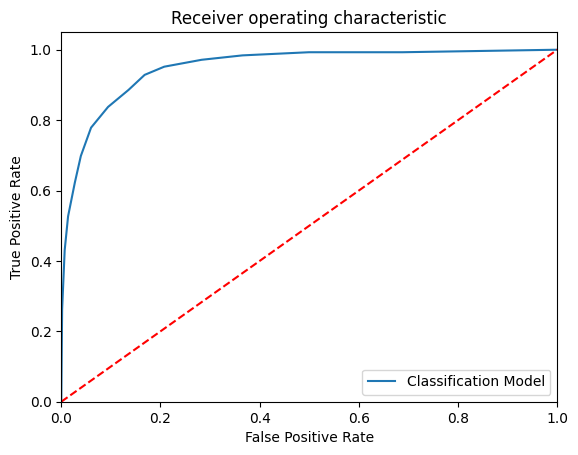

KNN_K_value =  15
Model Name:  KNeighborsClassifier(n_neighbors=15)
Confusion matrix : 
 [[482  78]
 [ 67 516]]
Outcome values : 
 482 78 67 516
Classification report : 
               precision    recall  f1-score   support

           1       0.88      0.86      0.87       560
           0       0.87      0.89      0.88       583

    accuracy                           0.87      1143
   macro avg       0.87      0.87      0.87      1143
weighted avg       0.87      0.87      0.87      1143

Accuracy : 87.3 %
Precision : 87.8 %
Recall : 86.1 %
F1 Score : 0.869
Specificity or True Negative Rate : 88.5 %
Balanced Accuracy : 87.3 %
MCC : 0.746
roc_auc_score: 0.873


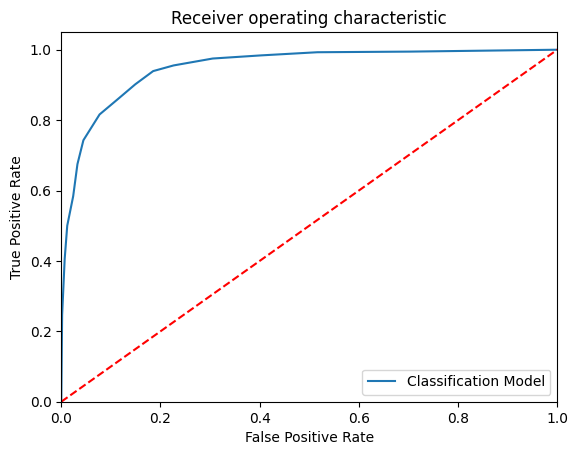

KNN_K_value =  16
Model Name:  KNeighborsClassifier(n_neighbors=16)
Confusion matrix : 
 [[469  91]
 [ 53 530]]
Outcome values : 
 469 91 53 530
Classification report : 
               precision    recall  f1-score   support

           1       0.90      0.84      0.87       560
           0       0.85      0.91      0.88       583

    accuracy                           0.87      1143
   macro avg       0.88      0.87      0.87      1143
weighted avg       0.88      0.87      0.87      1143

Accuracy : 87.4 %
Precision : 89.8 %
Recall : 83.8 %
F1 Score : 0.867
Specificity or True Negative Rate : 90.9 %
Balanced Accuracy : 87.4 %
MCC : 0.749
roc_auc_score: 0.873


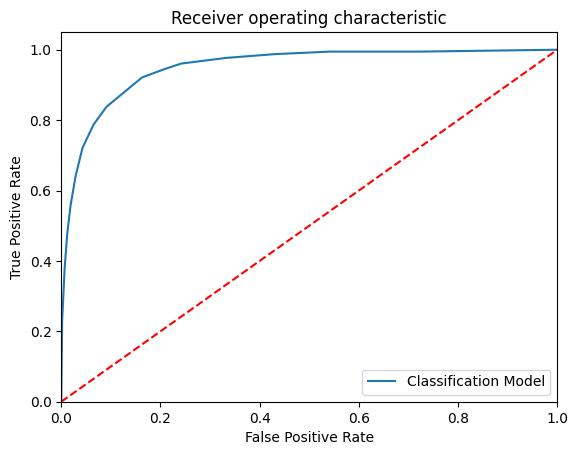

KNN_K_value =  17
Model Name:  KNeighborsClassifier(n_neighbors=17)
Confusion matrix : 
 [[484  76]
 [ 69 514]]
Outcome values : 
 484 76 69 514
Classification report : 
               precision    recall  f1-score   support

           1       0.88      0.86      0.87       560
           0       0.87      0.88      0.88       583

    accuracy                           0.87      1143
   macro avg       0.87      0.87      0.87      1143
weighted avg       0.87      0.87      0.87      1143

Accuracy : 87.3 %
Precision : 87.5 %
Recall : 86.4 %
F1 Score : 0.87
Specificity or True Negative Rate : 88.2 %
Balanced Accuracy : 87.3 %
MCC : 0.746
roc_auc_score: 0.873


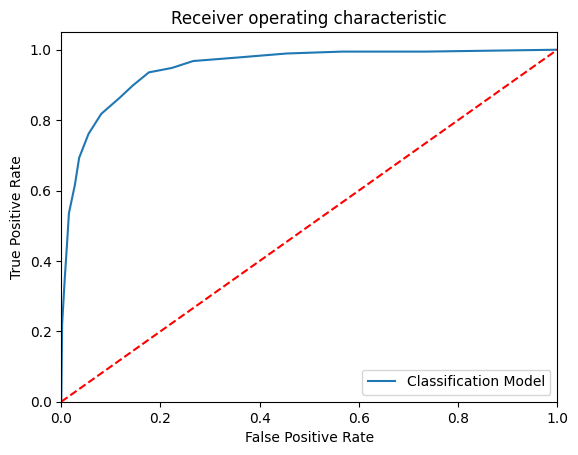

KNN_K_value =  18
Model Name:  KNeighborsClassifier(n_neighbors=18)
Confusion matrix : 
 [[474  86]
 [ 58 525]]
Outcome values : 
 474 86 58 525
Classification report : 
               precision    recall  f1-score   support

           1       0.89      0.85      0.87       560
           0       0.86      0.90      0.88       583

    accuracy                           0.87      1143
   macro avg       0.88      0.87      0.87      1143
weighted avg       0.87      0.87      0.87      1143

Accuracy : 87.4 %
Precision : 89.1 %
Recall : 84.6 %
F1 Score : 0.868
Specificity or True Negative Rate : 90.1 %
Balanced Accuracy : 87.4 %
MCC : 0.749
roc_auc_score: 0.873


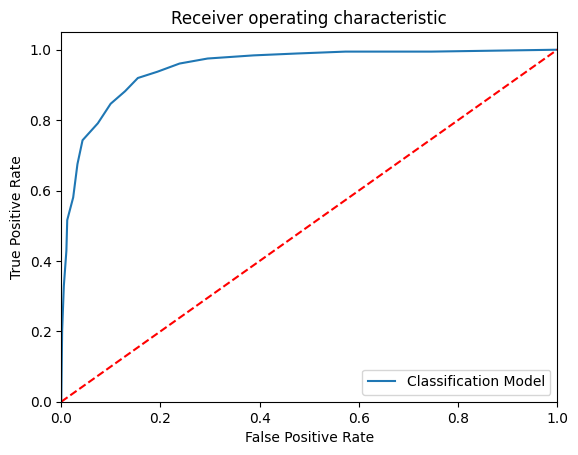

KNN_K_value =  19
Model Name:  KNeighborsClassifier(n_neighbors=19)
Confusion matrix : 
 [[489  71]
 [ 69 514]]
Outcome values : 
 489 71 69 514
Classification report : 
               precision    recall  f1-score   support

           1       0.88      0.87      0.87       560
           0       0.88      0.88      0.88       583

    accuracy                           0.88      1143
   macro avg       0.88      0.88      0.88      1143
weighted avg       0.88      0.88      0.88      1143

Accuracy : 87.8 %
Precision : 87.6 %
Recall : 87.3 %
F1 Score : 0.875
Specificity or True Negative Rate : 88.2 %
Balanced Accuracy : 87.8 %
MCC : 0.755
roc_auc_score: 0.877


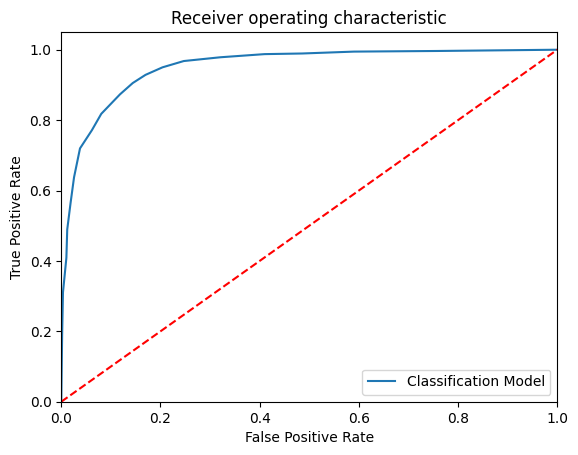

KNN_K_value =  20
Model Name:  KNeighborsClassifier(n_neighbors=20)
Confusion matrix : 
 [[476  84]
 [ 57 526]]
Outcome values : 
 476 84 57 526
Classification report : 
               precision    recall  f1-score   support

           1       0.89      0.85      0.87       560
           0       0.86      0.90      0.88       583

    accuracy                           0.88      1143
   macro avg       0.88      0.88      0.88      1143
weighted avg       0.88      0.88      0.88      1143

Accuracy : 87.7 %
Precision : 89.3 %
Recall : 85.0 %
F1 Score : 0.871
Specificity or True Negative Rate : 90.2 %
Balanced Accuracy : 87.6 %
MCC : 0.754
roc_auc_score: 0.876


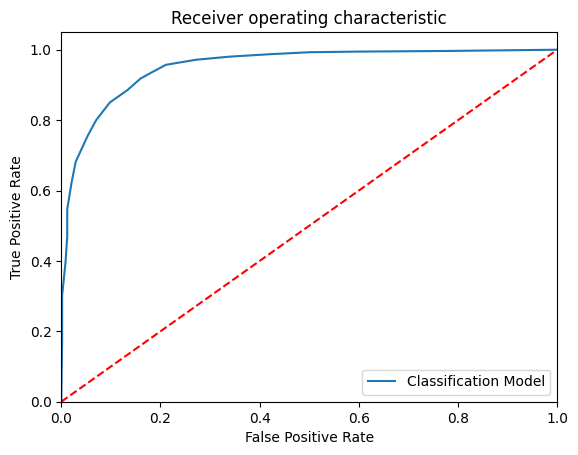

In [ ]:

# Bild KNN Model

from sklearn.neighbors import KNeighborsClassifier

from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

import sklearn.metrics as metrics

from sklearn.metrics import roc_curve, roc_auc_score

accuracy = []

for a in range(1, 21, 1):

    k = a

    # Build the model

    ModelKNN = KNeighborsClassifier(n_neighbors=k)

    # Train the model

    ModelKNN.fit(x_train, y_train)

    # Predict the model

    y_pred = ModelKNN.predict(x_test)
    y_pred_prob = ModelKNN.predict_proba(x_test)

    print('KNN_K_value = ', a)

    # Print the model name

    print('Model Name: ', ModelKNN)

    # confusion matrix in sklearn

    from sklearn.metrics import confusion_matrix
    from sklearn.metrics import classification_report

    # actual values

    actual = y_test

    # predicted values

    predicted = y_pred

    # confusion matrix

    matrix = confusion_matrix(actual,predicted, labels=[1,0],sample_weight=None, normalize=None)
    print('Confusion matrix : \n', matrix)

    # outcome values order in sklearn

    tp, fn, fp, tn = confusion_matrix(actual,predicted,labels=[1,0]).reshape(-1)
    print('Outcome values : \n', tp, fn, fp, tn)

    # classification report for precision, recall f1-score and accuracy

    C_Report = classification_report(actual,predicted,labels=[1,0])

    print('Classification report : \n', C_Report)

    # calculating the metrics

    sensitivity = round(tp/(tp+fn), 3);
    specificity = round(tn/(tn+fp), 3);
    accuracy = round((tp+tn)/(tp+fp+tn+fn), 3);
    balanced_accuracy = round((sensitivity+specificity)/2, 3);

    precision = round(tp/(tp+fp), 3);
    f1Score = round((2*tp/(2*tp + fp + fn)), 3);

    # Matthews Correlation Coefficient (MCC). Range of values of MCC lie between -1 to +1.
    # A model with a score of +1 is a perfect model and -1 is a poor model

    from math import sqrt

    mx = (tp+fp) * (tp+fn) * (tn+fp) * (tn+fn)
    MCC = round(((tp * tn) - (fp * fn)) / sqrt(mx), 3)

    print('Accuracy :', round(accuracy*100, 2),'%')
    print('Precision :', round(precision*100, 2),'%')
    print('Recall :', round(sensitivity*100,2), '%')
    print('F1 Score :', f1Score)
    print('Specificity or True Negative Rate :', round(specificity*100,2), '%'  )
    print('Balanced Accuracy :', round(balanced_accuracy*100, 2),'%')
    print('MCC :', MCC)

    # Area under ROC curve

    from sklearn.metrics import roc_curve, roc_auc_score

    print('roc_auc_score:', round(roc_auc_score(actual, predicted), 3))

    # ROC Curve

    from sklearn.metrics import roc_auc_score
    from sklearn.metrics import roc_curve
    model_roc_auc = roc_auc_score(actual, predicted)
    fpr, tpr, thresholds = roc_curve(actual, ModelKNN.predict_proba(x_test)[:,1])
    plt.figure()
    # plt.plot(fpr, tpr, label='Logistic Regression (area = %0.2f)' % logit_roc_auc)
    plt.plot(fpr, tpr, label= 'Classification Model' % model_roc_auc)
    plt.plot([0, 1], [0, 1],'r--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic')
    plt.legend(loc="lower right")
    #plt.savefig('Log_ROC')
    plt.show()
    new_row = {'Model Name' : ModelKNN,
               'KNN K Value' : a,
               'True_Positive' : tp,
               'False_Negative' : fn,
               'False_Positive' : fp,
               'True_Negative' : tn,
               'Accuracy' : accuracy,
               'Precision' : precision,
               'Recall' : sensitivity,
               'F1 Score' : f1Score,
               'Specificity' : specificity,
               'MCC':MCC,
               'ROC_AUC_Score':roc_auc_score(actual, predicted),
               'Balanced Accuracy':balanced_accuracy}
    KNNResults = KNNResults.append(new_row, ignore_index=True)

In [ ]:
#Display the results of KNN Algorithm
KNNResults

,Model Name,KNN K Value,True_Positive,False_Negative,False_Positive,True_Negative,Accuracy,Precision,Recall,F1 Score,Specificity,MCC,ROC_AUC_Score,Balanced Accuracy
0,KNeighborsClassifier(n_neighbors=1),1,478,82,77,506,0.861,0.861,0.854,0.857,0.868,0.722,0.860748,0.861
1,KNeighborsClassifier(n_neighbors=2),2,407,153,34,549,0.836,0.923,0.727,0.813,0.942,0.686,0.834233,0.834
2,KNeighborsClassifier(n_neighbors=3),3,481,79,62,521,0.877,0.886,0.859,0.872,0.894,0.753,0.876291,0.876
3,KNeighborsClassifier(n_neighbors=4),4,443,117,37,546,0.865,0.923,0.791,0.852,0.937,0.737,0.863803,0.864
4,KNeighborsClassifier(),5,490,70,60,523,0.886,0.891,0.875,0.883,0.897,0.772,0.886042,0.886
5,KNeighborsClassifier(n_neighbors=6),6,464,96,45,538,0.877,0.912,0.829,0.868,0.923,0.756,0.875692,0.876
6,KNeighborsClassifier(n_neighbors=7),7,489,71,61,522,0.885,0.889,0.873,0.881,0.895,0.769,0.884292,0.884
7,KNeighborsClassifier(n_neighbors=8),8,467,93,52,531,0.873,0.900,0.834,0.866,0.911,0.748,0.872367,0.872
8,KNeighborsClassifier(n_neighbors=9),9,489,71,62,521,0.884,0.887,0.873,0.880,0.894,0.767,0.883434,0.884
9,KNeighborsClassifier(n_neighbors=10),10,474,86,50,533,0.881,0.905,0.846,0.875,0.914,0.763,0.880333,0.880


In [ ]:
# Load the results file for classification
EMResults = pd.read_csv(r"/content/drive/MyDrive/EMResults.csv",header=0)
EMResults.head()

,Model Name,True_Positive,False_Negative,False_Positive,True_Negative,Accuracy,Precision,Recall,F1 Score,Specificity,MCC,ROC_AUC_Score,Balanced Accuracy


Model Name:  LogisticRegression()
Confusion matrix : 
 [[402 158]
 [151 432]]
Outcome values : 
 402 158 151 432
Classification report : 
               precision    recall  f1-score   support

           1       0.73      0.72      0.72       560
           0       0.73      0.74      0.74       583

    accuracy                           0.73      1143
   macro avg       0.73      0.73      0.73      1143
weighted avg       0.73      0.73      0.73      1143

Accuracy : 73.0 %
Precision : 72.7 %
Recall : 71.8 %
F1 Score : 0.722
Specificity or True Negative Rate : 74.1 %
Balanced Accuracy : 73.0 %
MCC : 0.459
roc_auc_score: 0.729


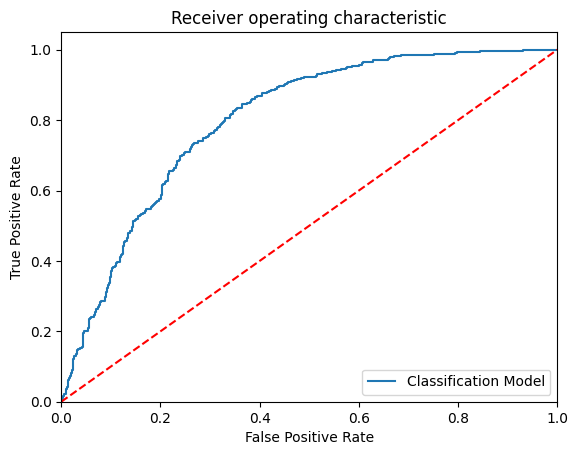

-----------------------------------------------------------------------------------------------------
Model Name:  DecisionTreeClassifier()
Confusion matrix : 
 [[449 111]
 [128 455]]
Outcome values : 
 449 111 128 455
Classification report : 
               precision    recall  f1-score   support

           1       0.78      0.80      0.79       560
           0       0.80      0.78      0.79       583

    accuracy                           0.79      1143
   macro avg       0.79      0.79      0.79      1143
weighted avg       0.79      0.79      0.79      1143

Accuracy : 79.1 %
Precision : 77.8 %
Recall : 80.2 %
F1 Score : 0.79
Specificity or True Negative Rate : 78.0 %
Balanced Accuracy : 79.1 %
MCC : 0.582
roc_auc_score: 0.791


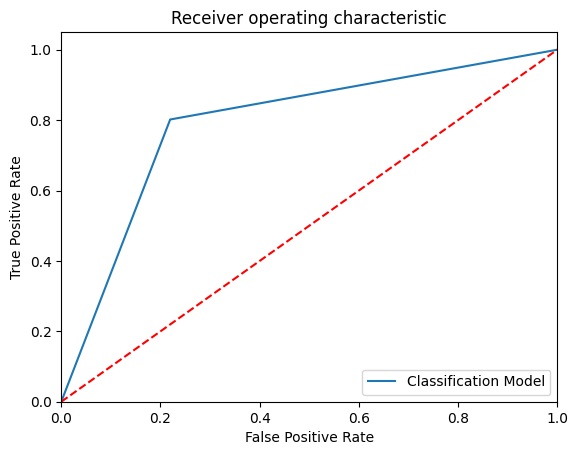

-----------------------------------------------------------------------------------------------------
Model Name:  RandomForestClassifier()
Confusion matrix : 
 [[488  72]
 [ 88 495]]
Outcome values : 
 488 72 88 495
Classification report : 
               precision    recall  f1-score   support

           1       0.85      0.87      0.86       560
           0       0.87      0.85      0.86       583

    accuracy                           0.86      1143
   macro avg       0.86      0.86      0.86      1143
weighted avg       0.86      0.86      0.86      1143

Accuracy : 86.0 %
Precision : 84.7 %
Recall : 87.1 %
F1 Score : 0.859
Specificity or True Negative Rate : 84.9 %
Balanced Accuracy : 86.0 %
MCC : 0.72
roc_auc_score: 0.86


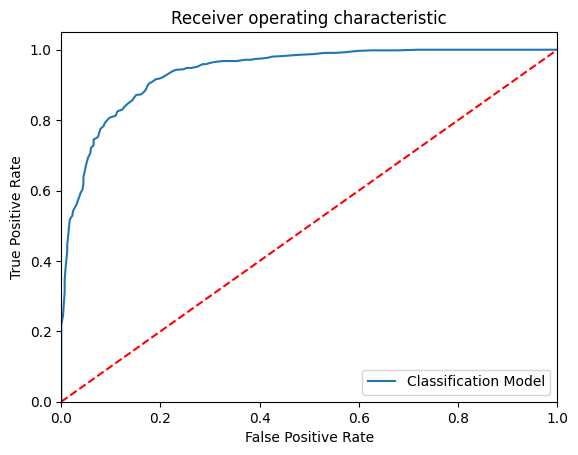

-----------------------------------------------------------------------------------------------------
Model Name:  ExtraTreesClassifier()
Confusion matrix : 
 [[493  67]
 [ 67 516]]
Outcome values : 
 493 67 67 516
Classification report : 
               precision    recall  f1-score   support

           1       0.88      0.88      0.88       560
           0       0.89      0.89      0.89       583

    accuracy                           0.88      1143
   macro avg       0.88      0.88      0.88      1143
weighted avg       0.88      0.88      0.88      1143

Accuracy : 88.3 %
Precision : 88.0 %
Recall : 88.0 %
F1 Score : 0.88
Specificity or True Negative Rate : 88.5 %
Balanced Accuracy : 88.3 %
MCC : 0.765
roc_auc_score: 0.883


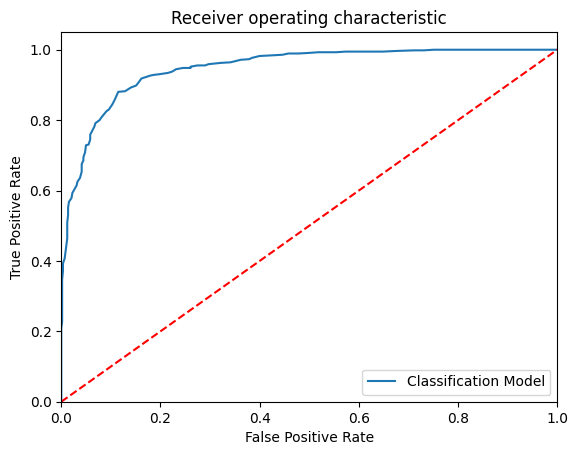

-----------------------------------------------------------------------------------------------------
Model Name:  KNeighborsClassifier(n_neighbors=1)
Confusion matrix : 
 [[478  82]
 [ 77 506]]
Outcome values : 
 478 82 77 506
Classification report : 
               precision    recall  f1-score   support

           1       0.86      0.85      0.86       560
           0       0.86      0.87      0.86       583

    accuracy                           0.86      1143
   macro avg       0.86      0.86      0.86      1143
weighted avg       0.86      0.86      0.86      1143

Accuracy : 86.1 %
Precision : 86.1 %
Recall : 85.4 %
F1 Score : 0.857
Specificity or True Negative Rate : 86.8 %
Balanced Accuracy : 86.1 %
MCC : 0.722
roc_auc_score: 0.861


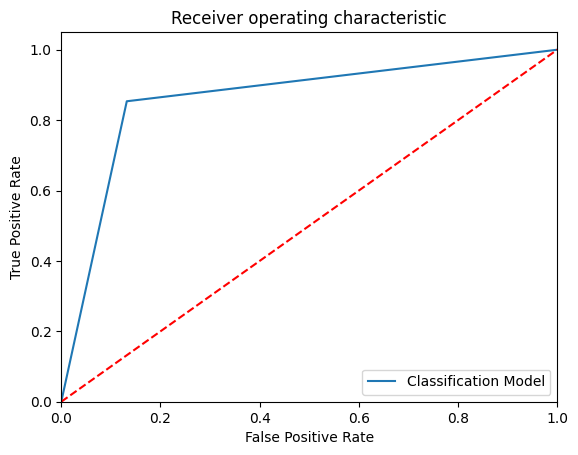

-----------------------------------------------------------------------------------------------------
Model Name:  GaussianNB()
Confusion matrix : 
 [[401 159]
 [151 432]]
Outcome values : 
 401 159 151 432
Classification report : 
               precision    recall  f1-score   support

           1       0.73      0.72      0.72       560
           0       0.73      0.74      0.74       583

    accuracy                           0.73      1143
   macro avg       0.73      0.73      0.73      1143
weighted avg       0.73      0.73      0.73      1143

Accuracy : 72.9 %
Precision : 72.6 %
Recall : 71.6 %
F1 Score : 0.721
Specificity or True Negative Rate : 74.1 %
Balanced Accuracy : 72.8 %
MCC : 0.457
roc_auc_score: 0.729


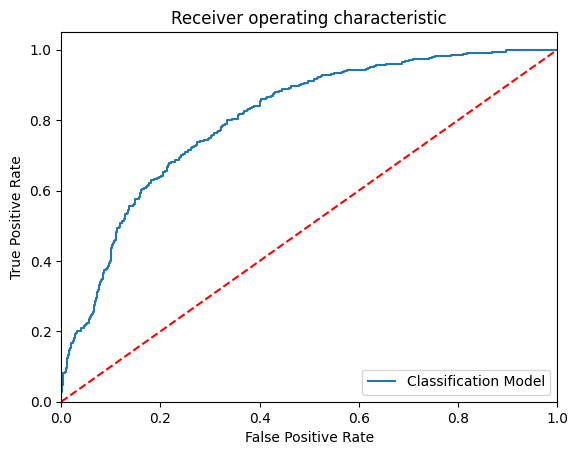

-----------------------------------------------------------------------------------------------------
Model Name:  SVC(class_weight='balanced', kernel='linear', probability=True, random_state=42)
Confusion matrix : 
 [[421 139]
 [173 410]]
Outcome values : 
 421 139 173 410
Classification report : 
               precision    recall  f1-score   support

           1       0.71      0.75      0.73       560
           0       0.75      0.70      0.72       583

    accuracy                           0.73      1143
   macro avg       0.73      0.73      0.73      1143
weighted avg       0.73      0.73      0.73      1143

Accuracy : 72.7 %
Precision : 70.9 %
Recall : 75.2 %
F1 Score : 0.73
Specificity or True Negative Rate : 70.3 %
Balanced Accuracy : 72.8 %
MCC : 0.455
roc_auc_score: 0.728


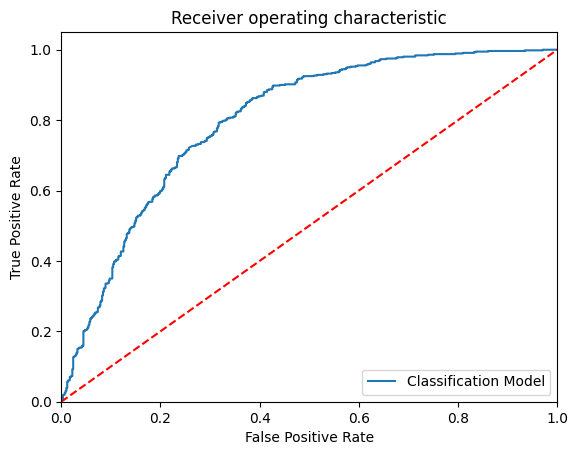

-----------------------------------------------------------------------------------------------------


In [ ]:
# Build the Calssification models and compare the results

from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC

# Create objects of classification algorithms with default hyper-parameters

ModelLR = LogisticRegression()
ModelDC = DecisionTreeClassifier()
ModelRF = RandomForestClassifier()
ModelET = ExtraTreesClassifier()
ModelKNN = KNeighborsClassifier(n_neighbors=1)
ModelGNB = GaussianNB()
ModelSVM = SVC(kernel='linear', random_state = 42, class_weight='balanced', probability=True)

# Evalution matrix for all the algorithms

MM = [ModelLR, ModelDC, ModelRF, ModelET, ModelKNN, ModelGNB, ModelSVM]
#MM = [ModelLR, ModelDC, ModelRF, ModelET]
for models in MM:

    # Train the model training dataset

    models.fit(x_train, y_train)

    # Prediction the model with test dataset

    y_pred = models.predict(x_test)
    y_pred_prob = models.predict_proba(x_test)

    # Print the model name

    print('Model Name: ', models)

    # confusion matrix in sklearn

    from sklearn.metrics import confusion_matrix
    from sklearn.metrics import classification_report

    # actual values

    actual = y_test

    # predicted values

    predicted = y_pred

    # confusion matrix

    matrix = confusion_matrix(actual,predicted, labels=[1,0],sample_weight=None, normalize=None)
    print('Confusion matrix : \n', matrix)

    # outcome values order in sklearn

    tp, fn, fp, tn = confusion_matrix(actual,predicted,labels=[1,0]).reshape(-1)
    print('Outcome values : \n', tp, fn, fp, tn)

    # classification report for precision, recall f1-score and accuracy

    C_Report = classification_report(actual,predicted,labels=[1,0])

    print('Classification report : \n', C_Report)

    # calculating the metrics

    sensitivity = round(tp/(tp+fn), 3);
    specificity = round(tn/(tn+fp), 3);
    accuracy = round((tp+tn)/(tp+fp+tn+fn), 3);
    balanced_accuracy = round((sensitivity+specificity)/2, 3);

    precision = round(tp/(tp+fp), 3);
    f1Score = round((2*tp/(2*tp + fp + fn)), 3);

    # Matthews Correlation Coefficient (MCC). Range of values of MCC lie between -1 to +1.
    # A model with a score of +1 is a perfect model and -1 is a poor model

    from math import sqrt

    mx = (tp+fp) * (tp+fn) * (tn+fp) * (tn+fn)
    MCC = round(((tp * tn) - (fp * fn)) / sqrt(mx), 3)

    print('Accuracy :', round(accuracy*100, 2),'%')
    print('Precision :', round(precision*100, 2),'%')
    print('Recall :', round(sensitivity*100,2), '%')
    print('F1 Score :', f1Score)
    print('Specificity or True Negative Rate :', round(specificity*100,2), '%'  )
    print('Balanced Accuracy :', round(balanced_accuracy*100, 2),'%')
    print('MCC :', MCC)

    # Area under ROC curve

    from sklearn.metrics import roc_curve, roc_auc_score

    print('roc_auc_score:', round(roc_auc_score(actual, predicted), 3))

    # ROC Curve

    from sklearn.metrics import roc_auc_score
    from sklearn.metrics import roc_curve
    Model_roc_auc = roc_auc_score(actual, predicted)
    fpr, tpr, thresholds = roc_curve(actual, models.predict_proba(x_test)[:,1])
    plt.figure()
    #
    plt.plot(fpr, tpr, label= 'Classification Model' % Model_roc_auc)
    plt.plot([0, 1], [0, 1],'r--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic')
    plt.legend(loc="lower right")
    plt.savefig('Log_ROC')
    plt.show()
    print('-----------------------------------------------------------------------------------------------------')
    #----------------------------------------------------------------------------------------------------------
    new_row = {'Model Name' : models,
               'True_Positive': tp,
               'False_Negative': fn,
               'False_Positive': fp,
               'True_Negative': tn,
               'Accuracy' : accuracy,
               'Precision' : precision,
               'Recall' : sensitivity,
               'F1 Score' : f1Score,
               'Specificity' : specificity,
               'MCC':MCC,
               'ROC_AUC_Score':roc_auc_score(actual, predicted),
               'Balanced Accuracy':balanced_accuracy}
    EMResults = EMResults.append(new_row, ignore_index=True)
    #----------------------------------------------------------------------------------------------------------
#======================================================================================================================>


In [ ]:
#Display the comparison results
EMResults.head(10)

,Model Name,True_Positive,False_Negative,False_Positive,True_Negative,Accuracy,Precision,Recall,F1 Score,Specificity,MCC,ROC_AUC_Score,Balanced Accuracy
0,LogisticRegression(),402,158,151,432,0.730,0.727,0.718,0.722,0.741,0.459,0.729426,0.730
1,DecisionTreeClassifier(),449,111,128,455,0.791,0.778,0.802,0.790,0.780,0.582,0.791116,0.791
2,"(DecisionTreeClassifier(max_features='sqrt', r...",488,72,88,495,0.860,0.847,0.871,0.859,0.849,0.720,0.860243,0.860
3,"(ExtraTreeClassifier(random_state=130079467), ...",493,67,67,516,0.883,0.880,0.880,0.880,0.885,0.765,0.882717,0.883
4,KNeighborsClassifier(n_neighbors=1),478,82,77,506,0.861,0.861,0.854,0.857,0.868,0.722,0.860748,0.861
5,GaussianNB(),401,159,151,432,0.729,0.726,0.716,0.721,0.741,0.457,0.728533,0.728
6,"SVC(class_weight='balanced', kernel='linear', ...",421,139,173,410,0.727,0.709,0.752,0.730,0.703,0.455,0.727522,0.728


In [ ]:
# Save results to a CSV file
EMResults.to_csv('basic_algo.csv', index=False)

# Download the file to your local machine
from google.colab import files
files.download('basic_algo.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
# Assuming you have also predicted using ExtraTreesClassifier(Model ET)
# Since having more accuracy we have choosen it for prediction
y_pred=ModelET.predict(x_test)

In [ ]:
# Display the Final results by merging duplicate file

Results=pd.DataFrame({'Quality_A':y_test,'Quality_P':y_pred})

# Merge two Dataframes on index of both the dataframes

ResultsFinal=bsdata_bk.merge(Results,left_index=True,right_index=True)

#Display 10 records randomly

ResultsFinal.sample(10)

,A_id,Size,Weight,Sweetness,Crunchiness,Juiciness,Ripeness,Acidity,Quality,Quality_A,Quality_P
2452,2452.0,1.370643,0.276336,-1.152380,1.415108,0.310668,0.712541,-3.799184056,bad,0,0
3359,3359.0,-2.598997,0.019600,1.000199,0.887717,3.735831,0.190812,3.760518321,bad,0,0
524,524.0,-2.067245,-0.272901,-1.110935,0.949659,-1.470450,-0.317205,-1.642436844,bad,0,0
508,508.0,-2.069803,-2.174906,-1.271279,1.575418,-0.662195,4.134099,-1.658382639,bad,0,0
3313,3313.0,-1.568585,-1.970700,1.262787,-0.524398,0.573744,2.011534,-2.824366834,good,1,1
3998,3998.0,-4.008004,-1.779337,2.366397,-0.200329,2.161435,0.214488,-2.229719806,good,1,1
2609,2609.0,-1.767223,-0.934014,0.531094,1.025545,1.699573,-1.215804,4.158394682,bad,0,0
1832,1832.0,-3.275164,-3.916602,-1.177153,1.114833,-1.988273,3.105279,-3.971721858,bad,0,0
3205,3205.0,-2.417839,-4.666295,-0.126117,1.304831,-2.195826,2.877771,-3.84312533,bad,0,0
2895,2895.0,-3.006404,0.571239,2.293591,1.479706,3.254113,-1.944413,-2.749218073,good,1,1


In [ ]:
# Display the Final results by data frame

Results = pd.DataFrame({ 'Quality_A':y_test, 'Quality_P':y_pred})

# Merge two Dataframes on index of both the dataframes

ResultsFinal = pd.DataFrame({'Quality_A': y_test, 'Quality_P': y_pred})

#Display 10 records randomly
ResultsFinal.sample(10)

,Quality_A,Quality_P
3686,0,0
3364,1,1
2944,0,1
2684,1,1
119,0,0
881,1,1
597,1,1
3837,1,1
848,1,1
272,0,0
